In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px
import seaborn as sns
import plotly.subplots
#from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

In [5]:
# DATA PREPARATION FOR SRC - Swiss Red Cross

file_path = "Individual.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')
df.info()

NS='SRC'
country='Switzerland'
# Filter the dataframe for 'country'
df = df[df['Country'] == country]

# Create dictionary to assign teams to cantons (called regions)
team_region_dict = {
'East Swiss RC': 'East SRC 2019',
'West Swiss RC': 'West SRC 2019',
'Rotkreuz Fahrdienst Fricktal': 'Argovie',
'SRK-Fachtagung': 'National',
'IT GS SRK': 'National',
'SRK-Rollstuhlfahrdienst_Freiamt': 'Argovie',
'Rotkreuz Fahrdienst Aarau': 'Argovie',
'Rotkreuz Fahrdienst Freiamt': 'Argovie',
'Rotkreuz Besuchs- und Begleitdienst AARAU': 'Argovie',
'Rotkreuz Besuchs- und Begleitdienst BADEN': 'Argovie',
'Rotkreuz Besuchs- und Begleitdienst FRICK': 'Argovie',
'Rotkreuz Besuchs- und Begleitdienst FREIAMT': 'Argovie',
'Rotkreuz Fahrdienst Baden': 'Argovie',
'Starthilfe Elternzeit': 'Argovie',
'Jugendrotkreuz Gruppenprojekte': 'Argovie',
'Jugendrotkreuz 1-1 Projekte': 'Argovie',
'Rotkreuz Schreibdienst ': 'Argovie',
'Freiwillige SRK Kantonalverband Unterwalden, Startumfrage': 'Unterwald',
'SRK Learning Organization': 'National',
'TeamBIM e referenti integrazione':'Ticino',
'Team PG e Animazione':'Ticino',
'TeamFormazione Alfa-Itaquo':'Ticino',
'job coach e Itapp':'Ticino',
'Direzione CRSS':'Ticino',
'Vorstandsseminar':'National',
}

# Create an empty 'region' column (region=canton) in the dataframe
# NB region with small caps to differentiate with Region = IFRC Regions
df['region'] = ''

# Iterate over unique 'region' values and prompt user for Center input
for team_name in df['Team Name'].unique():
    # Check if the team name is in the dictionary
    if team_name in team_region_dict:
        region = team_region_dict[team_name]
    else:
        # If the team name is not in the dictionary, prompt for user input
        region = input(f"Enter the URC region for Team Name '{team_name}': ")
    
    df.loc[df['Team Name'] == team_name, 'region'] = region
    #df.info()


#Export cleaned URC data to CSV file
df.to_csv(f'{NS}_ALL.csv', index=False)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         10668 non-null  object 
 1   Survey Data       10668 non-null  object 
 2   Well-being        10668 non-null  float64
 3   Needs             10668 non-null  float64
 4   Engagement        10668 non-null  float64
 5   Autonomy          10668 non-null  float64
 6   Belonging         10668 non-null  float64
 7   Competence        10668 non-null  float64
 8   Leadership        10668 non-null  float64
 9   Management        10668 non-null  float64
 10  Returns           10668 non-null  float64
 11  Rewards           10668 non-null  float64
 12  Status            10668 non-null  float64
 13  Myself            10668 non-null  int64  
 14  Tasks             10668 non-null  int64  
 15  Free              10668 non-null  int64  
 16  Mastery           10668 non-null  int64 

In [6]:
## List of teams for data editing
print(df['Team Name'].unique())
#print(team_df['region'].unique())

['East Swiss RC' 'West Swiss RC' 'Rotkreuz Fahrdienst Fricktal'
 'SRK-Fachtagung' 'IT GS SRK' 'SRK-Rollstuhlfahrdienst_Freiamt'
 'Rotkreuz Fahrdienst Aarau' 'Rotkreuz Fahrdienst Freiamt'
 'Rotkreuz Besuchs- und Begleitdienst AARAU'
 'Rotkreuz Besuchs- und Begleitdienst BADEN'
 'Rotkreuz Besuchs- und Begleitdienst FRICK'
 'Rotkreuz Besuchs- und Begleitdienst FREIAMT' 'Rotkreuz Fahrdienst Baden'
 'Starthilfe Elternzeit' 'Jugendrotkreuz Gruppenprojekte'
 'Jugendrotkreuz 1-1 Projekte' 'Rotkreuz Schreibdienst '
 'Freiwillige SRK Kantonalverband Unterwalden, Startumfrage'
 'Vorstandsseminar' 'SRK Learning Organization'
 'TeamBIM e referenti integrazione' 'Team PG e Animazione'
 'TeamFormazione Alfa-Itaquo' 'job coach e Itapp' 'Direzione CRSS']


In [13]:
## Keep only valid teams
# valid teams belong to a Region listed on the Motiro app URCS workspace
# list all teams to keep in URC dataframe

file_path = "SRC_ALL.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#valid_teams = ['Mykolaiv Region', 'Zytomyr Region', 'Zakarpattya Region', 'Kyiv Region']

# Keep only valid teams in dataframe
#df = df[df['region'].isin(valid_teams)]
#df.to_csv('URC_ALL.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         901 non-null    object 
 1   Survey Data       901 non-null    object 
 2   Well-being        901 non-null    float64
 3   Needs             901 non-null    float64
 4   Engagement        901 non-null    float64
 5   Autonomy          901 non-null    float64
 6   Belonging         901 non-null    float64
 7   Competence        901 non-null    float64
 8   Leadership        901 non-null    float64
 9   Management        901 non-null    float64
 10  Returns           901 non-null    float64
 11  Rewards           901 non-null    float64
 12  Status            901 non-null    float64
 13  Myself            901 non-null    int64  
 14  Tasks             901 non-null    int64  
 15  Free              901 non-null    int64  
 16  Mastery           901 non-null    int64  
 1

In [14]:
# STEP 2: Create a dataframe for SRC where one row is one team

df = pd.read_csv(file_path, sep=",", encoding='utf-8')

## for ALL, i.e. no more distinctions between volunteers and staff
team_df = df.groupby(['Team Name', 'region']).size().reset_index(name='size (n)')

# Filter numeric columns for mean and median calculations
numeric_cols = df.select_dtypes(include='number').columns

# Calculate the mean and median for each column
mean_df = df.groupby('Team Name')[numeric_cols].mean().round(1).reset_index()
median_df = df.groupby('Team Name')[numeric_cols].median().round(1).reset_index()

# Merge the size (count), mean, median, and nTeams DataFrames
team_df = team_df.merge(mean_df, on='Team Name', suffixes=('_mean', '_median')).merge(median_df, on='Team Name', suffixes=('_mean', '_median'))

# Clean staff and volnteer columns
team_df['Volunteer'] = team_df['Volunteer_median'].round(0).astype(int)
team_df['Staff'] = team_df['Staff_median'].round(0).astype(int)
# Drop useless columns from the DataFrame
team_df = team_df.drop(columns=['Volunteer_median', 'Volunteer_mean','Staff_median', 'Staff_mean'])

team_df.info()

# For ALL (Volunteers and staff) - create files with Team data
#team_df.to_excel(f'{NS}_team.xlsx', index=False)
team_df.to_csv(f'{NS}_team.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Team Name                25 non-null     object 
 1   region                   25 non-null     object 
 2   size (n)                 25 non-null     int64  
 3   Well-being_mean          25 non-null     float64
 4   Needs_mean               25 non-null     float64
 5   Engagement_mean          25 non-null     float64
 6   Autonomy_mean            25 non-null     float64
 7   Belonging_mean           25 non-null     float64
 8   Competence_mean          25 non-null     float64
 9   Leadership_mean          25 non-null     float64
 10  Management_mean          25 non-null     float64
 11  Returns_mean             25 non-null     float64
 12  Rewards_mean             25 non-null     float64
 13  Status_mean              25 non-null     float64
 14  Myself_mean              25 

In [15]:
# STEP 3: Create a dataframe for SRC where one row is one region (canton)

df = pd.read_csv(file_path, sep=",", encoding='utf-8')

## for ALL, i.e. no more distinctions between volunteers and staff
region_df = df.groupby(['region']).size().reset_index(name='size (n)')

# Filter numeric columns for mean and median calculations
numeric_cols = df.select_dtypes(include='number').columns

# Calculate the mean and median for each column
mean_df = df.groupby('region')[numeric_cols].mean().round(1).reset_index()
median_df = df.groupby('region')[numeric_cols].median().round(1).reset_index()

# Merge the size (count), mean, median, and nTeams DataFrames
region_df = region_df.merge(mean_df, on='region', suffixes=('_mean', '_median')).merge(median_df, on='region', suffixes=('_mean', '_median'))

# Clean staff and volnteer columns
region_df['Volunteer'] = region_df['Volunteer_median'].round(0).astype(int)
region_df['Staff'] = region_df['Staff_median'].round(0).astype(int)
# Drop useless columns from the DataFrame
region_df = region_df.drop(columns=['Volunteer_median', 'Volunteer_mean','Staff_median', 'Staff_mean'])

region_df.info()

# For ALL (Volunteers and staff) - create files with Region data
region_df.to_excel(f'{NS}_region.xlsx', index=False)
region_df.to_csv(f'{NS}_region.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   6 non-null      object 
 1   size (n)                 6 non-null      int64  
 2   Well-being_mean          6 non-null      float64
 3   Needs_mean               6 non-null      float64
 4   Engagement_mean          6 non-null      float64
 5   Autonomy_mean            6 non-null      float64
 6   Belonging_mean           6 non-null      float64
 7   Competence_mean          6 non-null      float64
 8   Leadership_mean          6 non-null      float64
 9   Management_mean          6 non-null      float64
 10  Returns_mean             6 non-null      float64
 11  Rewards_mean             6 non-null      float64
 12  Status_mean              6 non-null      float64
 13  Myself_mean              6 non-null      float64
 14  Tasks_mean               6 non

In [16]:
# Create tables for SRC - Swiss Red Cross per region (canton), containing key results for each team
# Load the data from the CSV file
file_path = "SRC_team.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#select only the relevant columns
columns = ['Team Name',
           'size (n)',
           'region',
           'Well-being_mean',
           'Needs_mean',
           'Engagement_mean',
           'Autonomy_mean',
           'Belonging_mean',
           'Competence_mean',
           'Leadership_mean',
           'Management_mean',
           'Returns_mean',
           'Rewards_mean',
           'Status_mean',
           'Myself_mean',
           'Tasks_mean',
           'Free_mean',
           'Mastery_mean',
           'Competent_mean',
           'Learn_mean',
           'Group_mean',
           'Talk_mean',
           'Care_mean',
           'Satisfied_mean',
           'Meaning_mean',
           'Stay_mean',
           'Ideas_mean',
           'Values_mean',
           'Understands_mean',
           'Encourages_mean',
           'Listens_mean',
           'Network_mean',
           'Friendly_mean',
           'Team_mean',
           'Appreciated_mean',
           'Responsibilities_mean',
           'Work_mean',
           'Impact_mean',
           'Strong_mean',
           'Drained_mean',
           'Frustrated_mean'
           ]

#Create a dictionary to change the column names to more readable names
column_names = {
    'size (n)': 'Number of team members',
    'region': 'region',
    'Well-being_mean': 'Well-being',
    'Needs_mean': 'Needs',
    'Engagement_mean': 'Engagement',
    'Autonomy_mean': 'Autonomy',
    'Belonging_mean': 'Belonging',
    'Competence_mean': 'Competence',
    'Leadership_mean': 'Leadership',
    'Management_mean': 'Management',
    'Returns_mean': 'Returns',
    'Rewards_mean': 'Rewards',
    'Status_mean': 'Status',
    'Myself_mean': 'Myself',
    'Tasks_mean': 'Tasks',
    'Free_mean': 'Free',
    'Mastery_mean': 'Mastery',
    'Competent_mean': 'Competent',
    'Learn_mean': 'Learn',
    'Group_mean': 'Group',
    'Talk_mean': 'Talk',
    'Care_mean': 'Care',
    'Satisfied_mean': 'Satisfied',
    'Meaning_mean': 'Meaning',
    'Stay_mean': 'Stay',
    'Ideas_mean': 'Ideas',
    'Values_mean': 'Values',
    'Understands_mean': 'Understands',
    'Encourages_mean': 'Encourages',
    'Listens_mean': 'Listens',
    'Network_mean': 'Network',
    'Friendly_mean': 'Friendly',
    'Team_mean': 'Team',
    'Appreciated_mean': 'Appreciated',
    'Responsibilities_mean': 'Responsibilities',
    'Work_mean': 'Work',
    'Impact_mean': 'Impact',
    'Strong_mean': 'Strong',
    'Drained_mean': 'Drained',
    'Frustrated_mean': 'Frustrated'
}

#rename the columns
df = df[columns].rename(columns=column_names)

#for each region, create a table for each team using renamed columns
for region in df['region'].unique():
    region_df = df[df['region'] == region]
    region_df.to_excel(f'{NS}_{region}_team.xlsx', index=False)
    region_df.to_csv(f'{NS}_{region}_team.csv', index=False)


In [17]:
# STEP 5: Create a dataframe for Ukraine RC where one row is a position (staff or volunteer)

file_path = f'{NS}_ALL.csv'
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

## for ALL, i.e. no more distinctions between volunteers and staff
Position_df = df.groupby(['Position']).size().reset_index(name='size (n)')

# Filter numeric columns for mean and median calculations
numeric_cols = df.select_dtypes(include='number').columns

# Calculate the mean and median for each column
mean_df = df.groupby('Position')[numeric_cols].mean().round(1).reset_index()
median_df = df.groupby('Position')[numeric_cols].median().round(1).reset_index()

# Merge the size (count), mean, median, and nTeams DataFrames
Position_df = Position_df.merge(mean_df, on='Position', suffixes=('_mean', '_median')).merge(median_df, on='Position', suffixes=('_mean', '_median'))

Position_df.info()

# For ALL (Volunteers and staff) - create files with Region data
Position_df.to_excel(f'{NS}_Position.xlsx', index=False)
Position_df.to_csv(f'{NS}_Position.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 82 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Position                 2 non-null      object 
 1   size (n)                 2 non-null      int64  
 2   Well-being_mean          2 non-null      float64
 3   Needs_mean               2 non-null      float64
 4   Engagement_mean          2 non-null      float64
 5   Autonomy_mean            2 non-null      float64
 6   Belonging_mean           2 non-null      float64
 7   Competence_mean          2 non-null      float64
 8   Leadership_mean          2 non-null      float64
 9   Management_mean          2 non-null      float64
 10  Returns_mean             2 non-null      float64
 11  Rewards_mean             2 non-null      float64
 12  Status_mean              2 non-null      float64
 13  Myself_mean              2 non-null      float64
 14  Tasks_mean               2 non

834


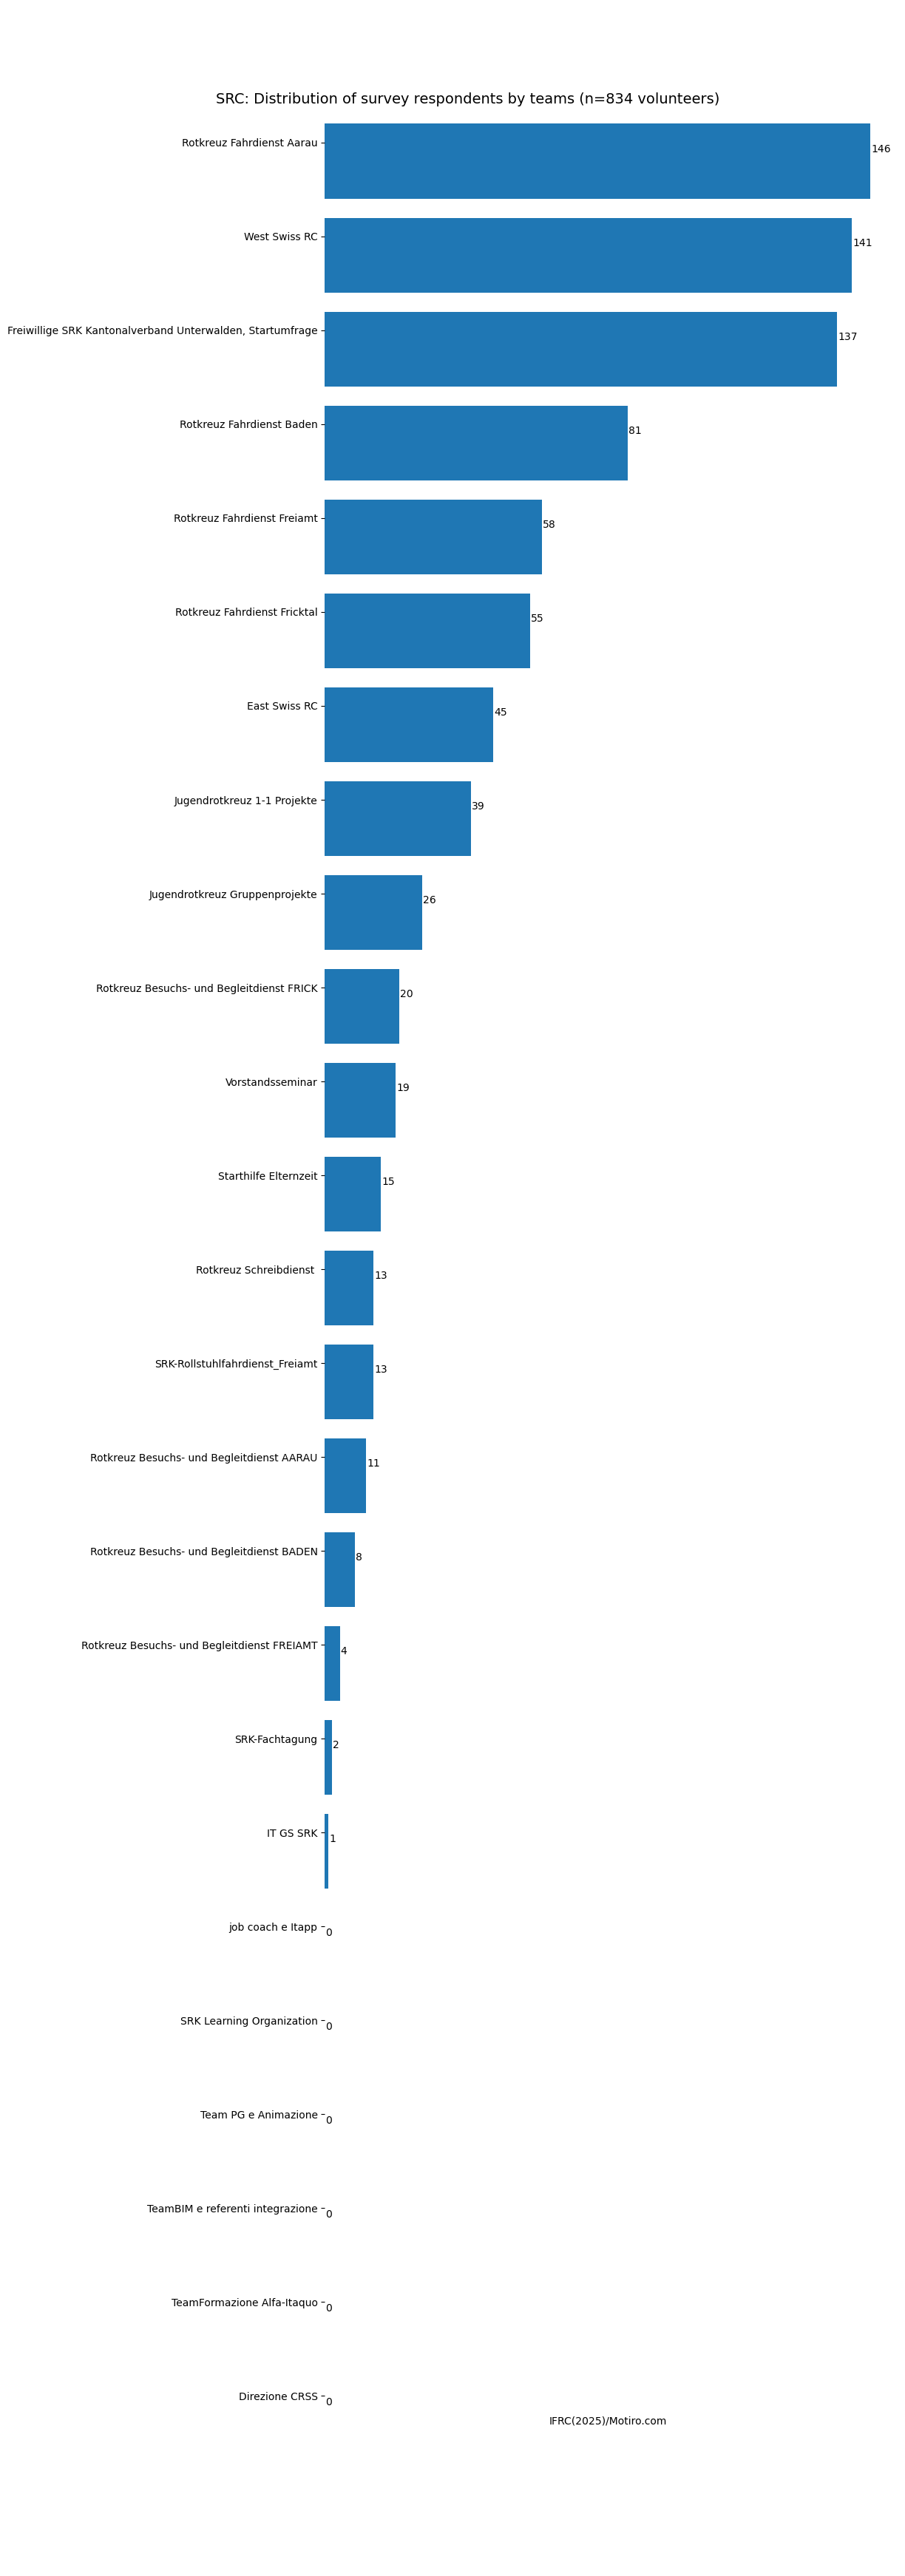

In [23]:
#  SWISS RED CROSS - DATA DESCRIPTION - Volunteer Teams

file_path = f'{NS}_ALL.csv'
df = pd.read_csv(file_path, sep=",", encoding='utf-8')
df.shape

# Drop from illegitimate teams from dataframe
df = df.drop(df[df['region'] =='dk'].index)
df.shape

# Group the dataframe by teams and calculate the sum of 'Volunteer' 
grouped_df = df.groupby('Team Name').agg({'Volunteer': 'sum'}).sort_values('Volunteer', ascending=True)

# Count the total number of respondents (n)
n = df['Volunteer'].sum()
print(n)

# Get the list of teams
Teams = grouped_df.index

# Set the height of each bar
bar_height = 0.4

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 45))

# Create an array of indices for the y-axis positions
y = np.arange(len(Teams))

# Plot the bars for volunteers
ax.barh(y, grouped_df['Volunteer'], height=bar_height*2, label='Volunteer', )
#ax.axvline(x=5, color='gray', linestyle='--')

# remove frame around the plot
sns.despine(ax=None, top=True, right=True, left=True, bottom=True, offset=0, trim=False)

# Plot the bars for staff
# ax.barh(y + bar_height, grouped_df['Staff'], height=bar_height, label='Staff', color='C1')

# Set the y-axis ticks and labels
ax.set_yticks(y + bar_height/2)
ax.set_yticklabels(Teams, size=10)

# Set the x-axis label
#ax.set_xlabel('Number of Respondents')

#remove x axis
plt.xticks([]) 

#annotate bar plot with values
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), size=10)
 
plt.text(60, -0.1, "IFRC(2025)/Motiro.com", fontdict={'size': 10})
ax.set_title(f'{NS}: Distribution of survey respondents by teams (n={n} volunteers)', x=0.25, y=0.96, fontsize=14)

# Adjust the layout to accommodate the y-axis labels
#plt.tight_layout()

plt.savefig(f'{NS}-VolRespondentsByTeam.png', bbox_inches='tight', pad_inches=-0)
# Show the plot
plt.show()


67


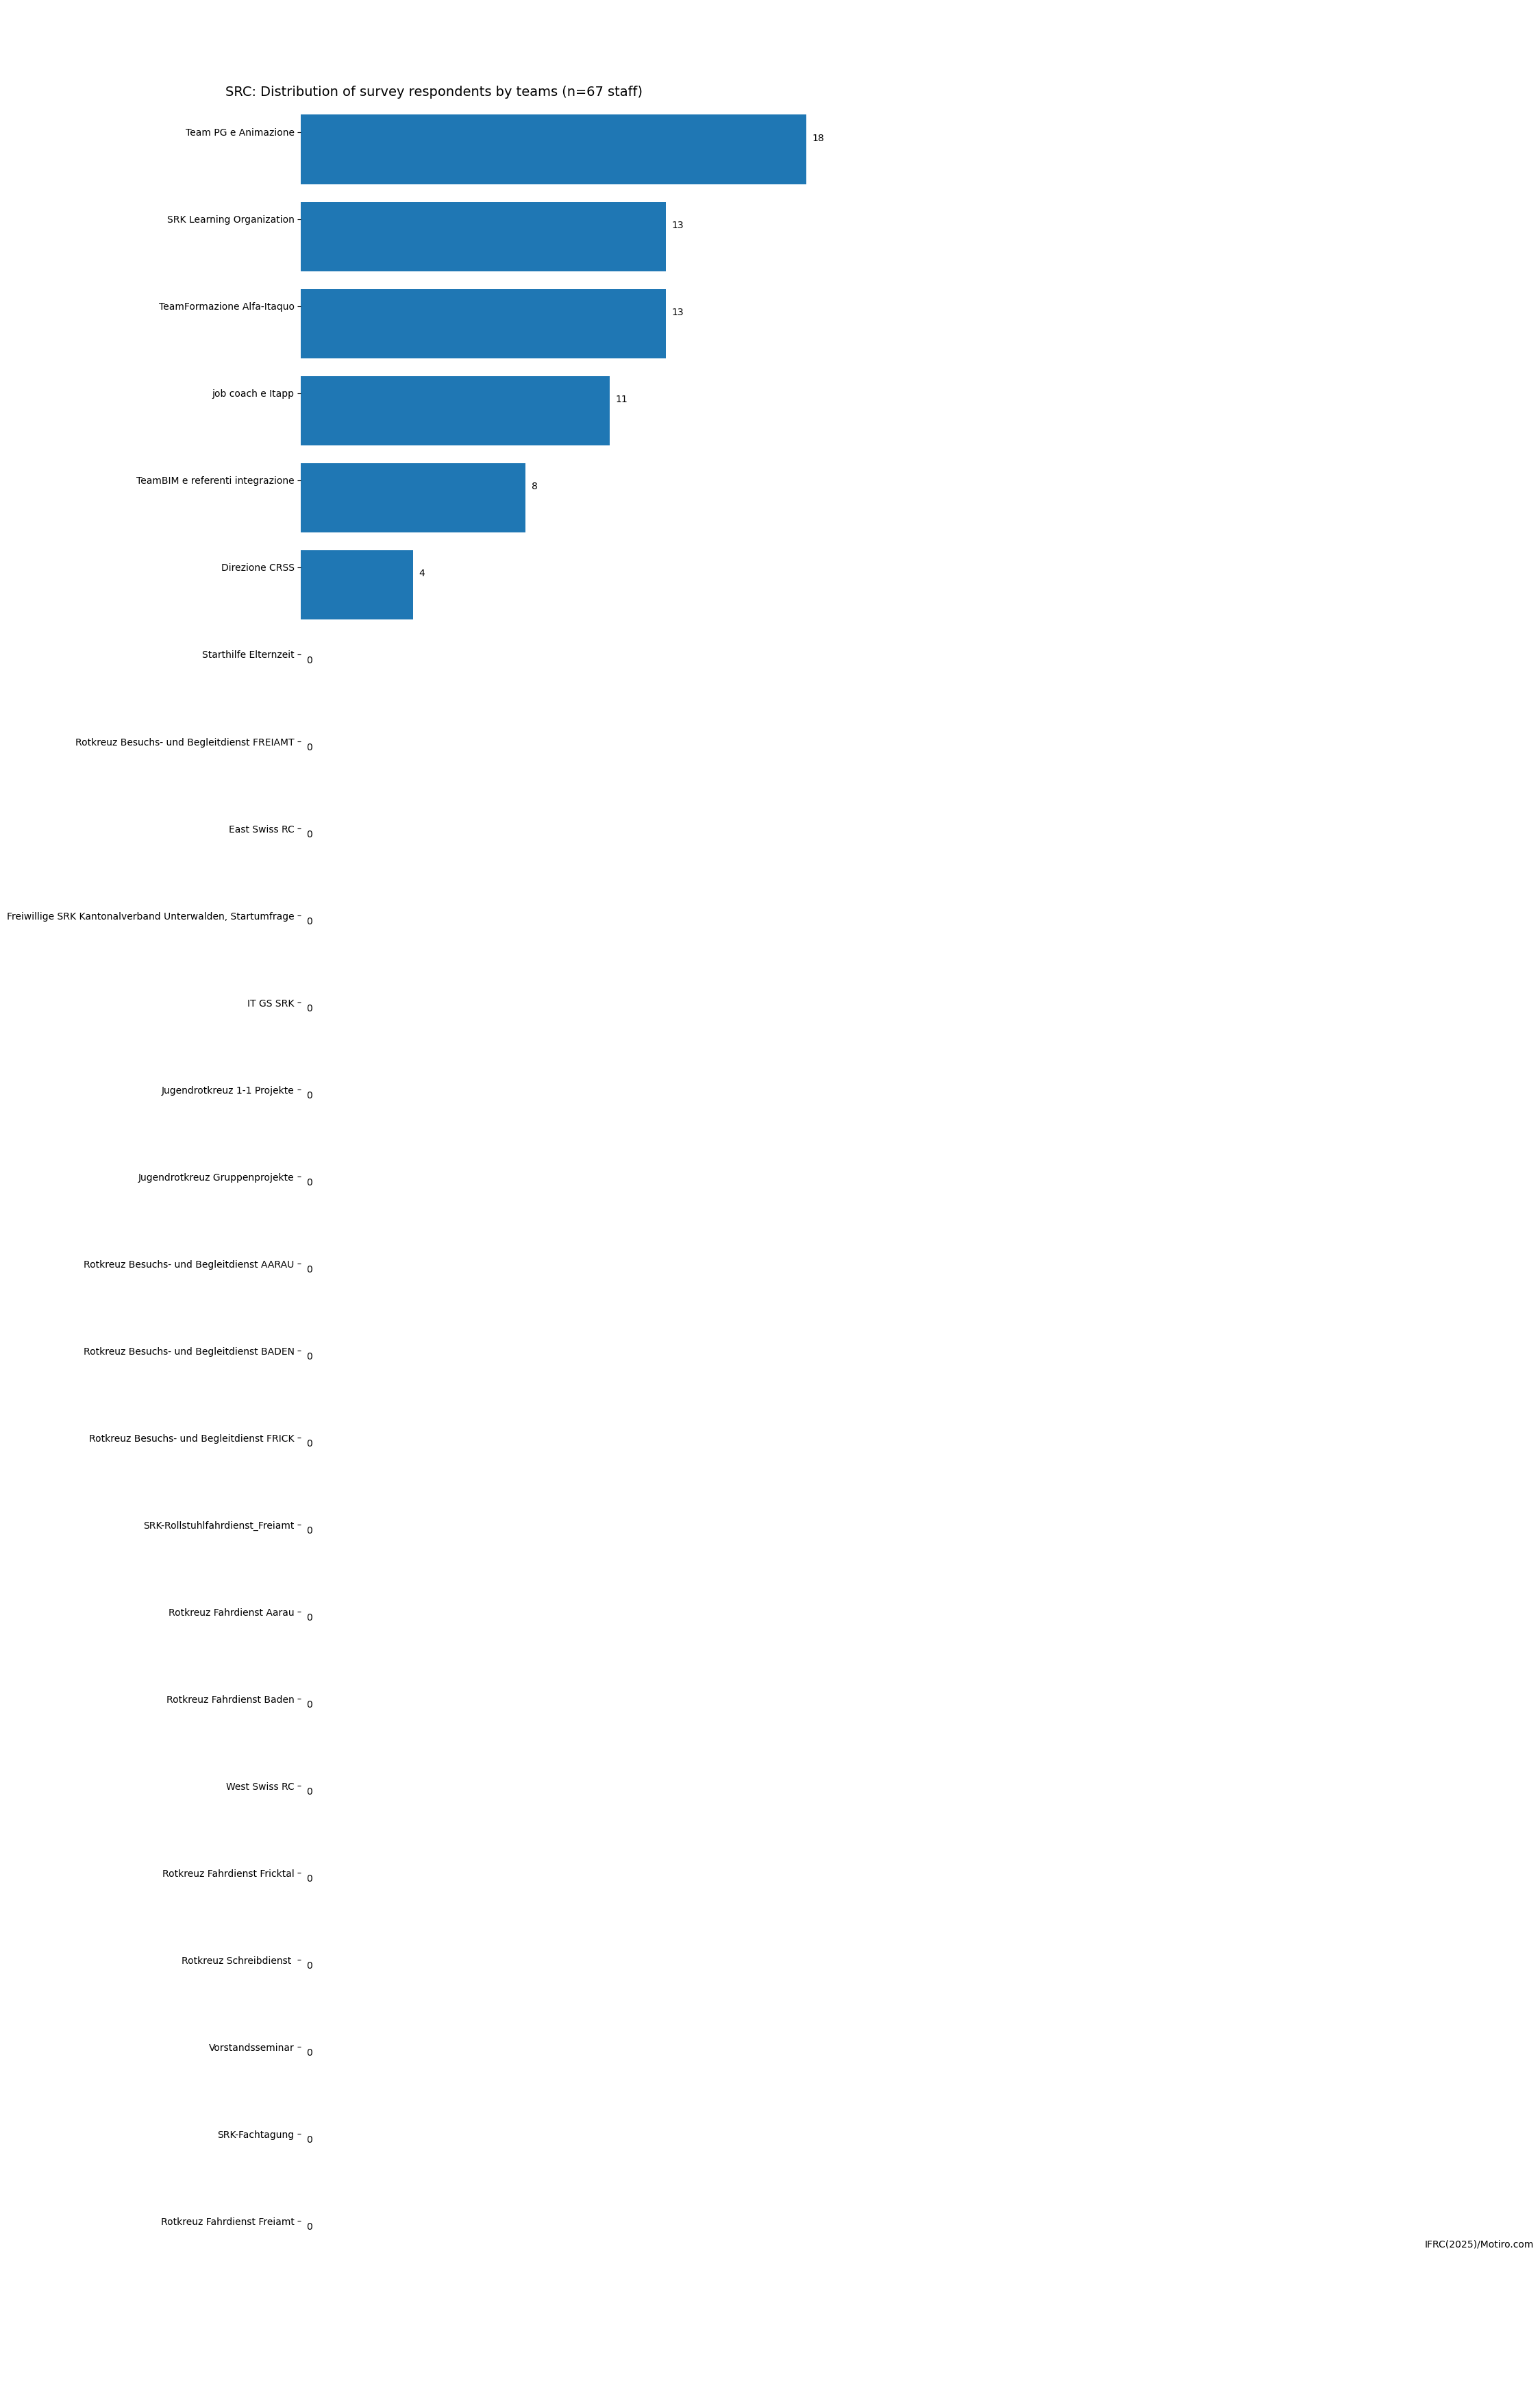

In [24]:
#  UKRAINE RED CROSS - DATA DESCRIPTION - Staff Teams

df = pd.read_csv(f'{NS}_ALL.csv', sep=",", encoding='utf-8')
df.shape

# Drop from illegitimate teams from dataframe
df = df.drop(df[df['region'] =='dk'].index)
df.shape

# Group the dataframe by teams and calculate the sum of 'Volunteer' 
grouped_df = df.groupby('Team Name').agg({'Staff': 'sum'}).sort_values('Staff', ascending=True)

# Count the total number of respondents (n)
n = df['Staff'].sum()
print(n)

# Get the list of teams
Teams = grouped_df.index

# Set the height of each bar
bar_height = 0.4

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 45))

# Create an array of indices for the y-axis positions
y = np.arange(len(Teams))

# Plot the bars for volunteers
ax.barh(y, grouped_df['Staff'], height=bar_height*2, label='Staff', )
#ax.axvline(x=5, color='gray', linestyle='--')

# remove frame around the plot
sns.despine(ax=None, top=True, right=True, left=True, bottom=True, offset=0, trim=False)

# Plot the bars for staff
# ax.barh(y + bar_height, grouped_df['Staff'], height=bar_height, label='Staff', color='C1')

# Set the y-axis ticks and labels
ax.set_yticks(y + bar_height/2)
ax.set_yticklabels(Teams, size=10)

# Set the x-axis label
#ax.set_xlabel('Number of Respondents')

#remove x axis
plt.xticks([]) 

#annotate bar plot with values
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), size=10)
 
plt.text(40, -0.1, "IFRC(2025)/Motiro.com", fontdict={'size': 10})
ax.set_title(f'{NS}: Distribution of survey respondents by teams (n={n} staff)', x=0.25, y=0.96, fontsize=14)

# Adjust the layout to accommodate the y-axis labels
#plt.tight_layout()

plt.savefig(f'{NS}-StaffRespondentsByTeam.png', bbox_inches='tight', pad_inches=-0)
# Show the plot
plt.show()


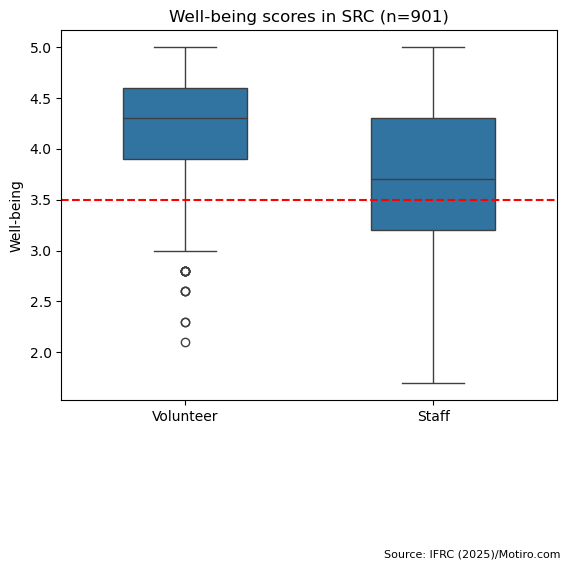

In [25]:
# STAFF and VOLUNTEERS - Box plots to see distribution in well-being scores in key dimensions, by region (canton)

df = pd.read_csv(f'{NS}_ALL.csv', sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Staff']

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

# Filter the DataFrame for teams from countries that surveyd both staff and volunteers
#df = df[df['Country'].isin(['Ukraine'])].copy()

# Count the total number of respondents (n)
#n = df['Volunteer'].sum() + df['Staff'].sum()

bplot=sns.boxplot(y='Well-being', x='Position', 
                 data=df, 
                 width=0.5)

# plt.setp(bplot.get_xticklabels(), rotation=45)
plt.xlabel('')

# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='red', linestyle='--')

# Set the title
bplot.set_title(f'Well-being scores in {NS} (n={n})')

plt.text(0.8, -0.01, "Source: IFRC (2025)/Motiro.com", fontdict={'size': 8})

# Save and show the plot
plt.savefig(f'{NS}-VOL-STAFF_Wellbeing_boxplot.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
# Box plots to see dispersion in key dimensions

df = pd.read_csv("Individual.csv", sep=",", encoding='utf-8')

# Specify the x-axis and y-axis variables for each plot
variables = [
    ('Position', 'Well-being'),
    ('Position', 'Engagement'),
    ('Position', 'Needs'),
    ('Position', 'Stay'),
    ('Position', 'Leadership'),
    ('Position', 'Management')
    ]

# Create a 3x3 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 8), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Staff']

# Filter the DataFrame for teams from 'Mexico' and 'Lebanon'
df = df[df['country'].isin(['Ukraine'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

for i, (x_var, y_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    bplot=sns.boxplot(y=x_var, x=y_var, 
                 data=df, 
                 width=0.4,
                 ax=ax)
    bplot.set(ylabel=None)
    # Add vertical line to represent cut off values
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.set_xlabel(y_var, fontsize=15, x=0.5, y=100)
    ax.tick_params(axis='both', labelsize=13)
    ax.spines['bottom'].set_color('gray')
    ax.spines['top'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.spines['left'].set_color('gray')
    #set margin
    ax.margins(x=0, y=23)

# Set the title
ax.set_title(f'Dispersion of scores among volunteers and staff in Ukraine (n={n})',
pad=50, y=3.2, x=-0.2, fontdict={'size': 20})

plt.text(2.6, 2.5, "Source: IFRC (2024)/Motiro.com", fontdict={'size': 14})

# Save and show the plot
plt.savefig('VOL-STAFF_combined URC boxplot.png', bbox_inches='tight', pad_inches=0)
plt.show()

834 6997 7831


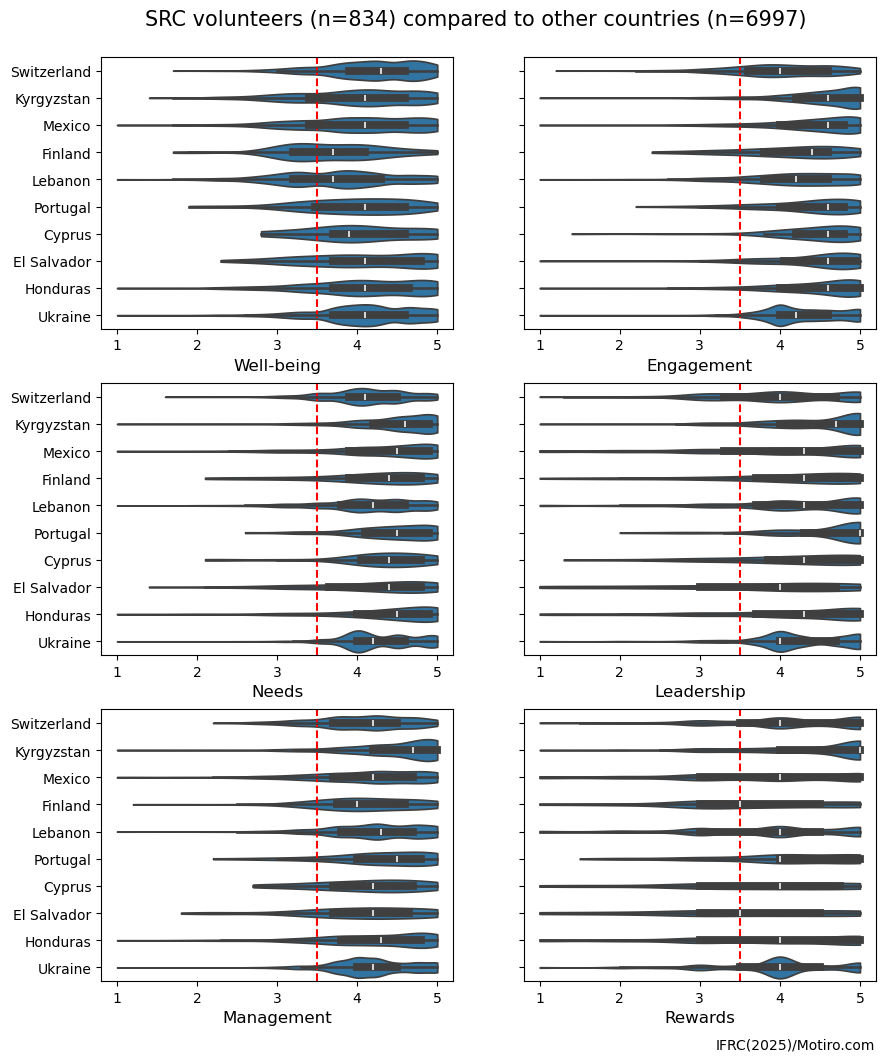

In [28]:
# Compare NS with volunteer benchmaks from other countries
file_path = "Individual.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
VOL_df = df[df['Position'] == 'Volunteer'].copy()

# Get the DataFrame for teams from 'NS'
NS_df = pd.read_csv(f'{NS}_ALL.csv', sep=",", encoding='utf-8')

#count the number of volunteers from NS
n_NS =  NS_df['Volunteer'].sum()

# Filter the DataFrame for selected countries with many volunteers
Country_df = VOL_df[VOL_df['Country'].isin(['Ukraine',
                                            'Lebanon',
                                            'Mexico',
                                            'Honduras',
                                            'El Salvador',
                                            'Portugal',
                                            'Kyrgyzstan',
                                            'Finland',
                                            'Cyprus',
                                            #'Switzerland'
                                            ])].copy()

#count the number of volunteers from the other countries
n_country =  Country_df['Volunteer'].sum()

#total sample for the graphs:
n = n_NS + n_country

print(n_NS, n_country, n)

# Merge the two dataframes
NS_df = pd.concat([NS_df, Country_df], ignore_index=True)

# violin plots by team for selected variables
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Needs'),
    ('Leadership'),
    ('Management'),
    ('Rewards')
    ]

# Create a 3x2 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12), sharex=False, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax.axvline(x=3.5, color='red', linestyle='--')
    ax=sns.violinplot(
        data=NS_df, x=x_var,
        y='Country', #replace team name with circle to group URC teams
        cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
plt.suptitle(f'{NS} volunteers (n={n_NS}) compared to other countries (n={n_country})', x=0.5, y=0.92, fontsize=15)
plt.text(3.2, 12, "IFRC(2025)/Motiro.com", fontdict={'size': 10})

plt.savefig(f'{NS}_countries.png', bbox_inches='tight', pad_inches=0.1)

834 6997 7831


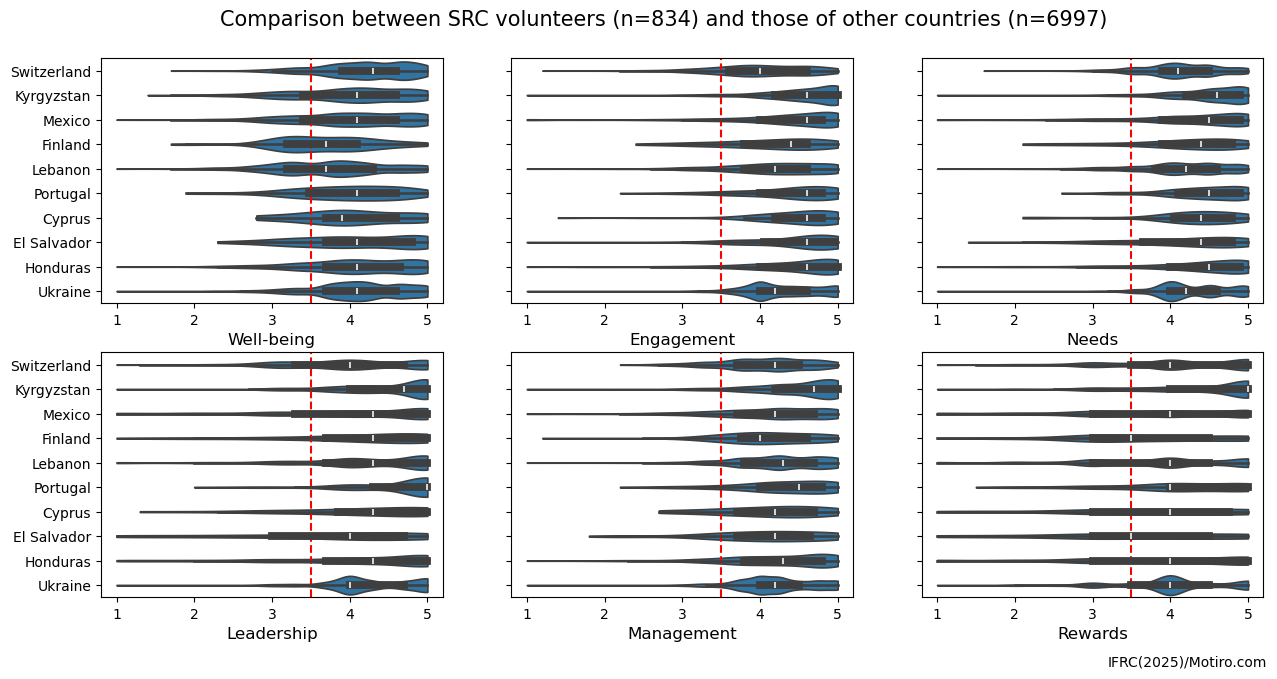

In [29]:
# SLIDE. Compare URC with volunteer benchmaks from other countries
file_path = "Individual.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
VOL_df = df[df['Position'] == 'Volunteer'].copy()

# Get the DataFrame for teams from 'Ukraine'
NS_df = pd.read_csv(f'{NS}_ALL.csv', sep=",", encoding='utf-8')

#count the number of volunteers from Switzerland
n_NS =  NS_df['Volunteer'].sum()

# Filter the DataFrame for selected countries with many volunteers
Country_df = VOL_df[VOL_df['Country'].isin(['Ukraine',
                                            'Lebanon',
                                            'Mexico',
                                            'Honduras',
                                            'El Salvador',
                                            'Portugal',
                                            'Kyrgyzstan',
                                            'Finland',
                                            'Cyprus',
                                            #'Switzerland'
                                            ])].copy()

#count the number of volunteers from the other countries
n_country =  Country_df['Volunteer'].sum()

#total sample for the graphs:
n = n_NS + n_country

print(n_NS, n_country, n)

# Merge the two dataframes
NS_df = pd.concat([NS_df, Country_df], ignore_index=True)

# violin plots by team for selected variables
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Needs'),
    ('Leadership'),
    ('Management'),
    ('Rewards')
    ]

# Create a 3x2 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7), sharex=False, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax.axvline(x=3.5, color='red', linestyle='--')
    ax=sns.violinplot(
        data=NS_df, x=x_var,
        y='Country', #replace team name with circle to group NS teams
        cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
plt.suptitle(f"Comparison between {NS} volunteers (n={n_NS}) and those of other countries (n={n_country})", 
             x=0.5, y=0.95, fontsize=15)
plt.text(3.2, 12.3, "IFRC(2025)/Motiro.com", fontdict={'size': 10})

plt.savefig('{NS}_countries slide.png', bbox_inches='tight', pad_inches=0.1)

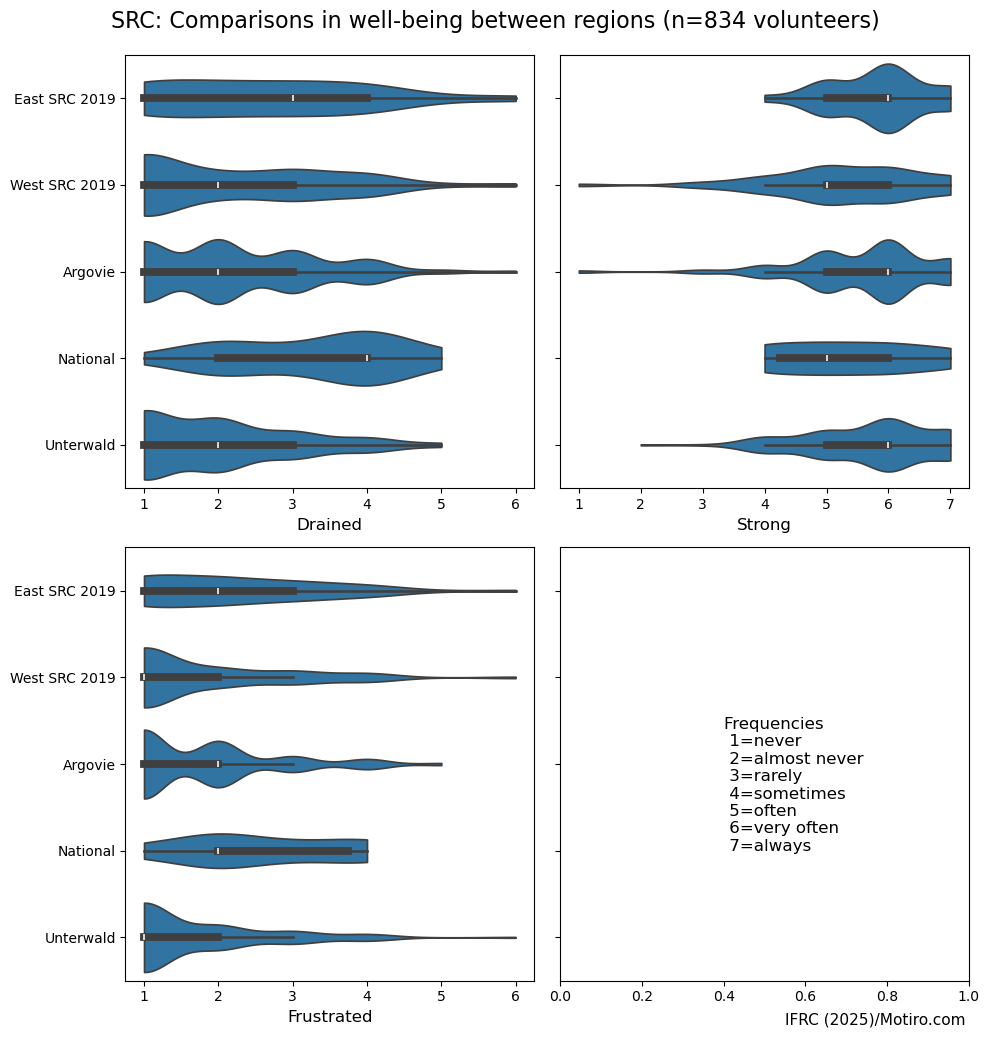

In [33]:
# Compare NS regions in VOLUNTEER WELL-BEING
# plot includes only 3 questions are on a frequency scale of 7 to avoid confusion.
# Get the DataFrame for teams from 'NS'
file_path = f'{NS}_ALL.csv'
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#count the number of respondents from NS
n =  df['Volunteer'].sum()

# Filter the dataframe for 'Position' = 'Volunteer'
VOL_df = df[df['Position'] == 'Volunteer'].copy()

# violin plots by team for selected variables
variables = [
    ('Drained'),
    ('Strong'),
    ('Frustrated')
    ]

# Create a 2x2 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=False, sharey=True)
sns.set_style(style=None, rc=None)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax=sns.violinplot(
        data=VOL_df, x=x_var,
        y='region',
        cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'{NS}: Comparisons in well-being between regions (n={n} volunteers)', x=0.5, y=1.03, fontsize=16)

plt.text(0.4, 3,
"Frequencies \n 1=never \n 2=almost never \n 3=rarely \n 4=sometimes \n 5=often \n 6=very often \n 7=always",
fontdict={'size': 12})

plt.text(0.55, 5, "IFRC (2025)/Motiro.com", fontdict={'size': 11})

plt.savefig(f'{NS}_Team Wellbeing frequencies violinplots.png', bbox_inches='tight', pad_inches=0.1)

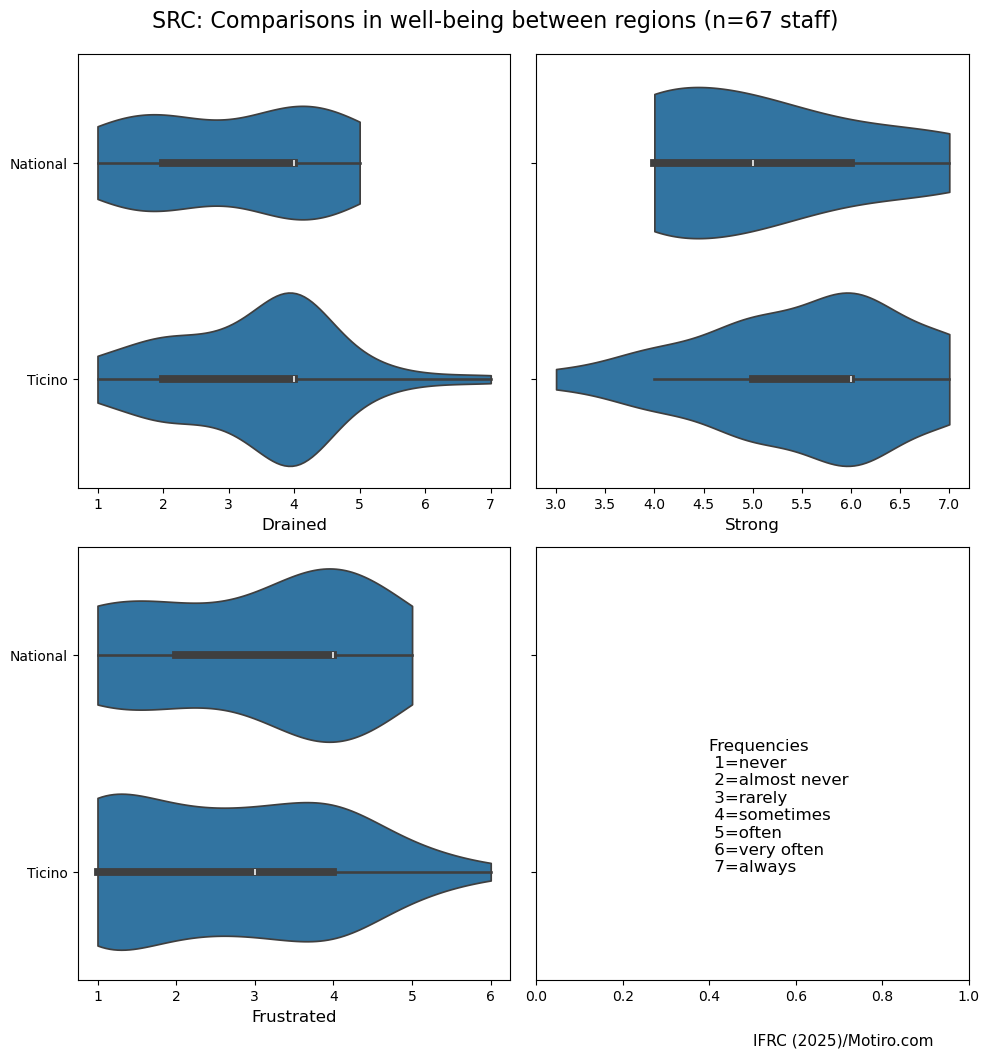

In [39]:
# Compare Ukraine RC regions in STAFF WELL-BEING
# plot includes only 3 questions are on a frequency scale of 7 to avoid confusion.
# Get the DataFrame for teams from 'Ukraine'
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#count the number of respondents from Ukraine
n =  df['Staff'].sum()

# Filter the dataframe for 'Position' = 'Staff'
Staff_df = df[df['Position'] == 'Staff'].copy()

# violin plots by team for selected variables
variables = [
    ('Drained'),
    ('Strong'),
    ('Frustrated')
    ]

# Create a 2x2 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=False, sharey=True)
sns.set_style(style=None, rc=None)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax=sns.violinplot(
        data=Staff_df, x=x_var,
        y='region',
        cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'{NS}: Comparisons in well-being between regions (n={n} staff)', x=0.5, y=1.03, fontsize=16)

plt.text(0.4, 1,
"Frequencies \n 1=never \n 2=almost never \n 3=rarely \n 4=sometimes \n 5=often \n 6=very often \n 7=always",
fontdict={'size': 12})

plt.text(0.5, 1.8, "IFRC (2025)/Motiro.com", fontdict={'size': 11})

plt.savefig(f'{NS}_Team Wellbeing frequencies violinplots.png', bbox_inches='tight', pad_inches=0.1)

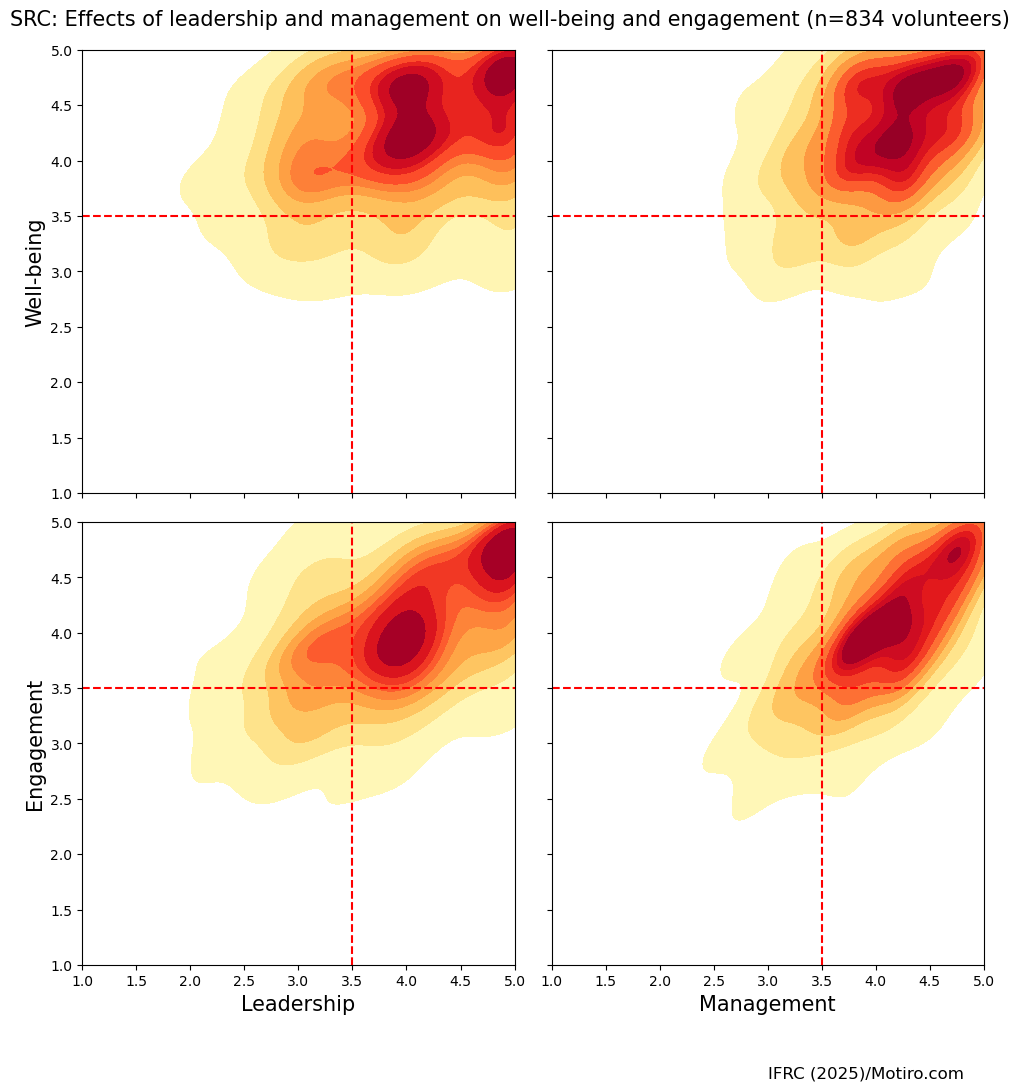

In [40]:
# Combined heatmaps Ukraine RED CROSS
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Well-being'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Engagement'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Engagement'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(15)

# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'{NS}: Effects of leadership and management on well-being and engagement (n={n} volunteers)',
             y=1.02, x=0.5, size=15)

plt.text(3, -0.02, "IFRC (2025)/Motiro.com", fontdict={'size': 12})

plt.savefig(f'{NS} heatmaps WB,Eng - Lead,Mgt.png', bbox_inches='tight', pad_inches=0)

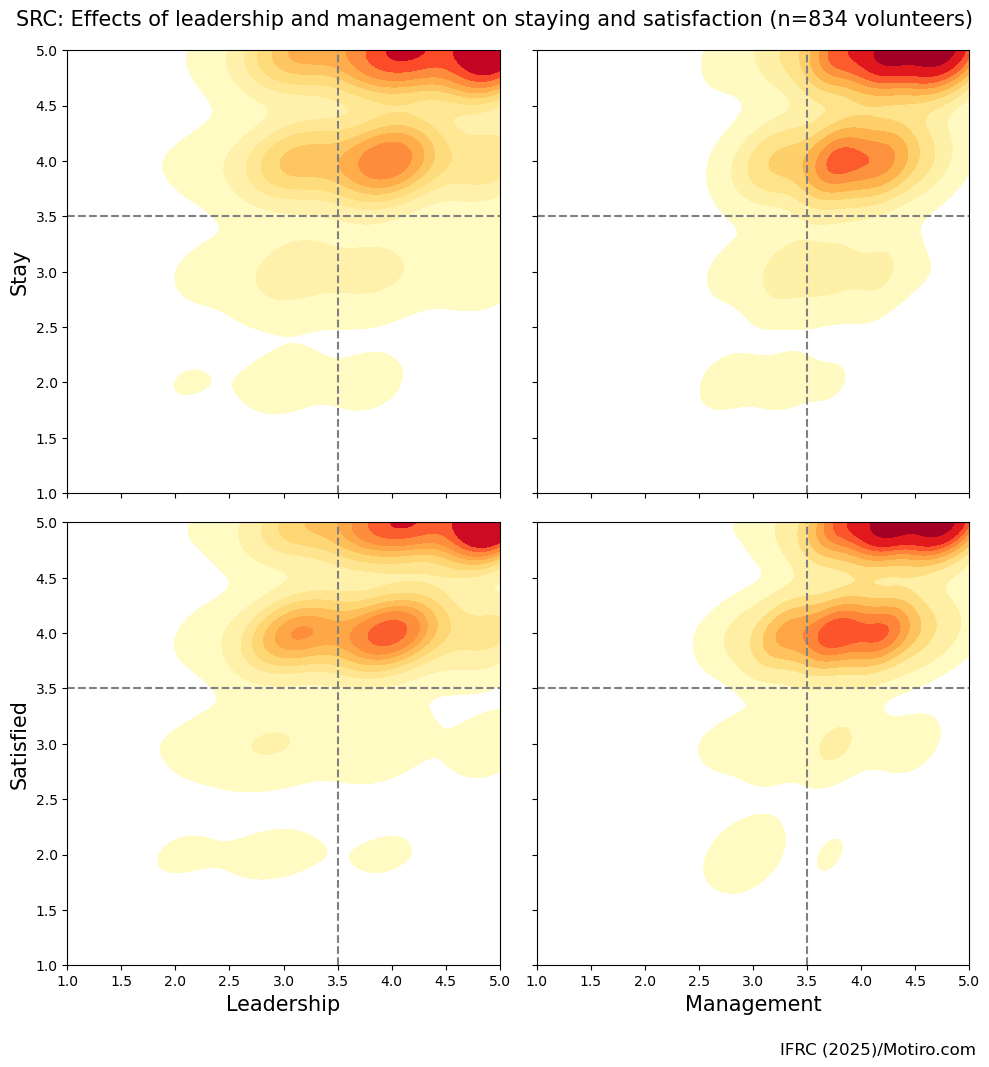

In [41]:
# Combined heatmaps UKRAINE RED CROSS
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)

# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'{NS}: Effects of leadership and management on staying and satisfaction (n={n} volunteers)',
             y=1.02, x=0.5, size=15)

plt.text(3.25, 0.2, "IFRC (2025)/Motiro.com", fontdict={'size': 12})

plt.savefig(f'{NS} stay heatmaps.png', bbox_inches='tight', pad_inches=0)

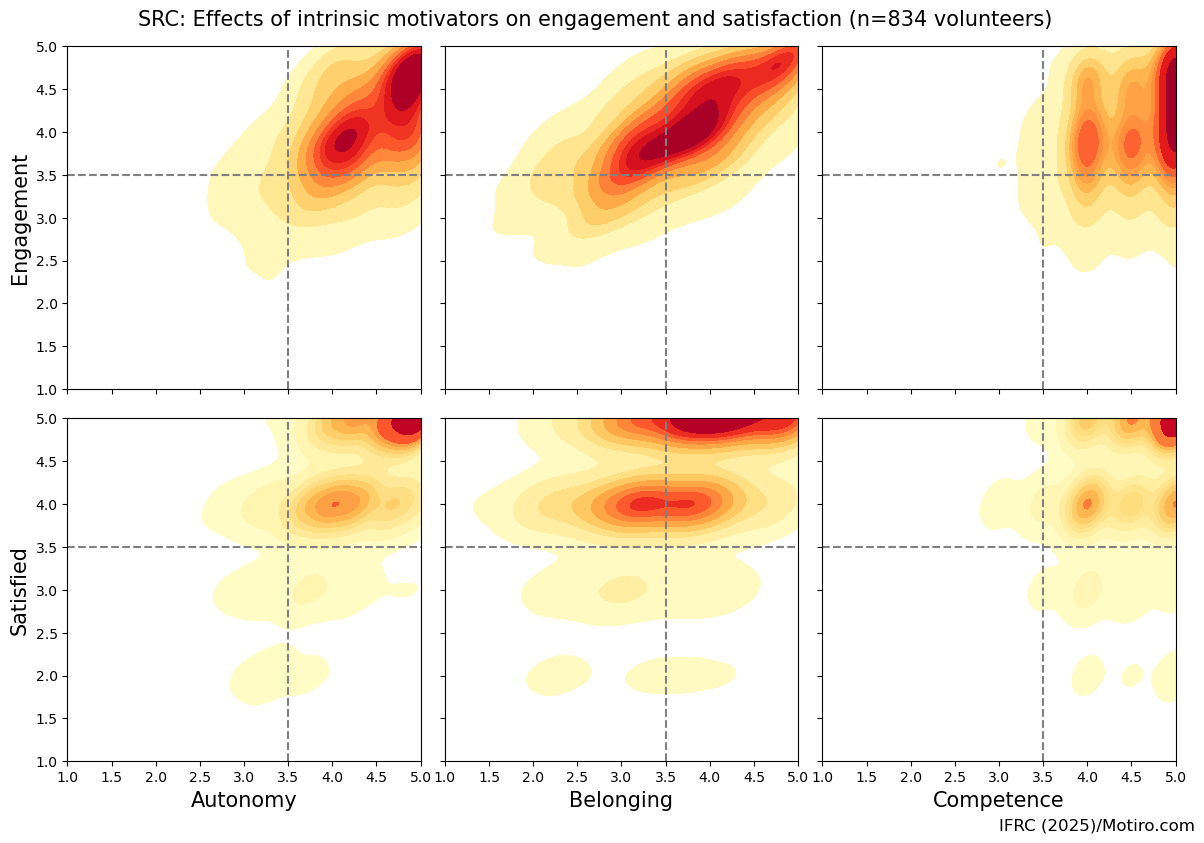

In [42]:
# SLIDE Combined heatmaps UKRAINE RED CROSS values, engagement, well-being and 3 needs
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Engagement'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Engagement'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Engagement'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'{NS}: Effects of intrinsic motivators on engagement and satisfaction (n={n} volunteers)',
             y=1.02, x=0.5, size=15)

plt.text(3, 0.2, "IFRC (2025)/Motiro.com", fontdict={'size': 12})

plt.savefig(f'{NS} stay heatmaps Slide.png', bbox_inches='tight', pad_inches=0)

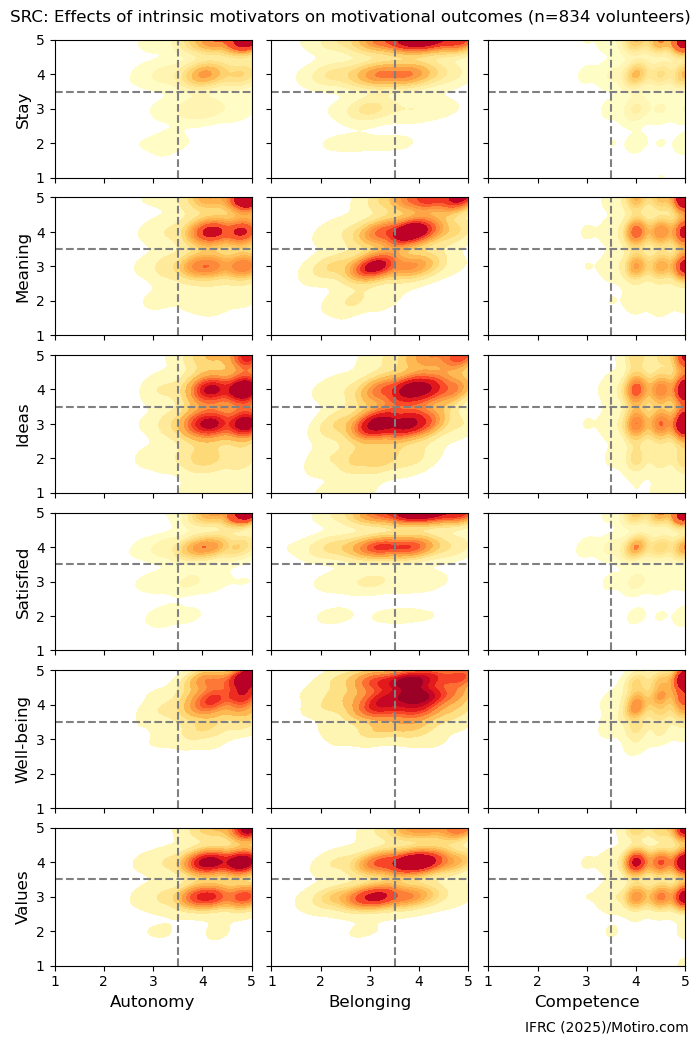

In [44]:

# Combined heatmaps UKRAINE RED CROSS 6 outcomes and 3 needs
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(6, 3, figsize=(7, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Stay'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Meaning'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[2, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Ideas'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[2, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[2, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[3, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[3, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[3, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[4, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[4, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[4, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[5, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Values'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[5, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[5, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'{NS}: Effects of intrinsic motivators on motivational outcomes (n={n} volunteers)',
             y=1.015, x=0.5, size=12)

plt.text(1.75, -0.9, "IFRC (2025)/Motiro.com", fontdict={'size': 10})

plt.savefig(f'{NS} outcome-3needs heatmaps.png', bbox_inches='tight', pad_inches=0)

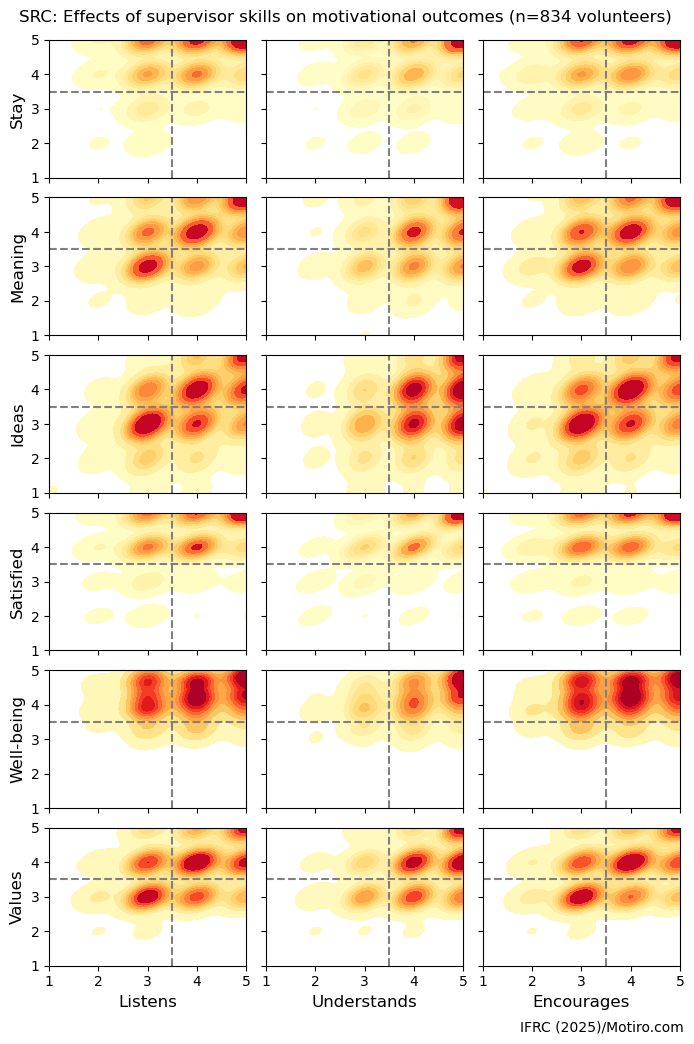

In [45]:

# Combined heatmaps UKRAINE RED CROSS 6 outcomes and 3 leadership skills
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(6, 3, figsize=(7, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Stay'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Meaning'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[2, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Ideas'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[2, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[2, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[3, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[3, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[3, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[4, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[4, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[4, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[5, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Values'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[5, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[5, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'{NS}: Effects of supervisor skills on motivational outcomes (n={n} volunteers)',
             y=1.015, x=0.5, size=12)

plt.text(1.75, -0.9, "IFRC (2025)/Motiro.com", fontdict={'size': 10})

plt.savefig(f'{NS} outcome-leadership heatmaps.png', bbox_inches='tight', pad_inches=0)

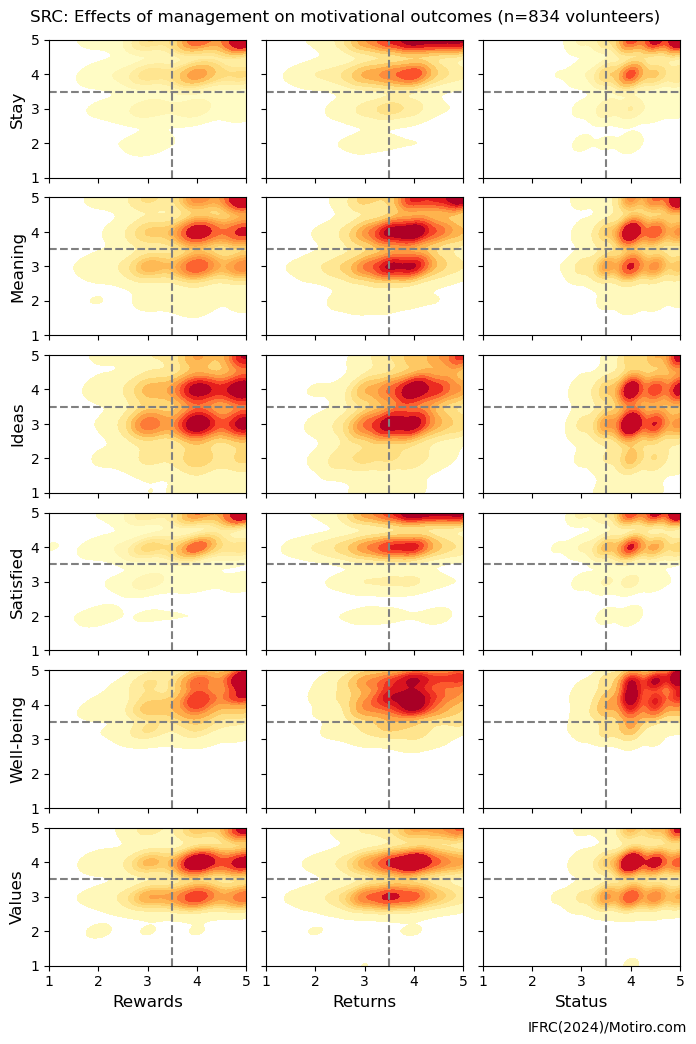

In [46]:
# Combined heatmaps UKRAINE RED CROSS 6 outcomes and 3 Management incentives
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(6, 3, figsize=(7, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Stay'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Meaning'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[2, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Ideas'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[2, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[2, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[3, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[3, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[3, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[4, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[4, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[4, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[5, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Values'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[5, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[5, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'{NS}: Effects of management on motivational outcomes (n={n} volunteers)',
             y=1.015, x=0.5, size=12)

plt.text(1.9, -0.9, "IFRC(2024)/Motiro.com", fontdict={'size': 10})

plt.savefig(f'{NS} outcome-Management heatmaps.png', bbox_inches='tight', pad_inches=0)

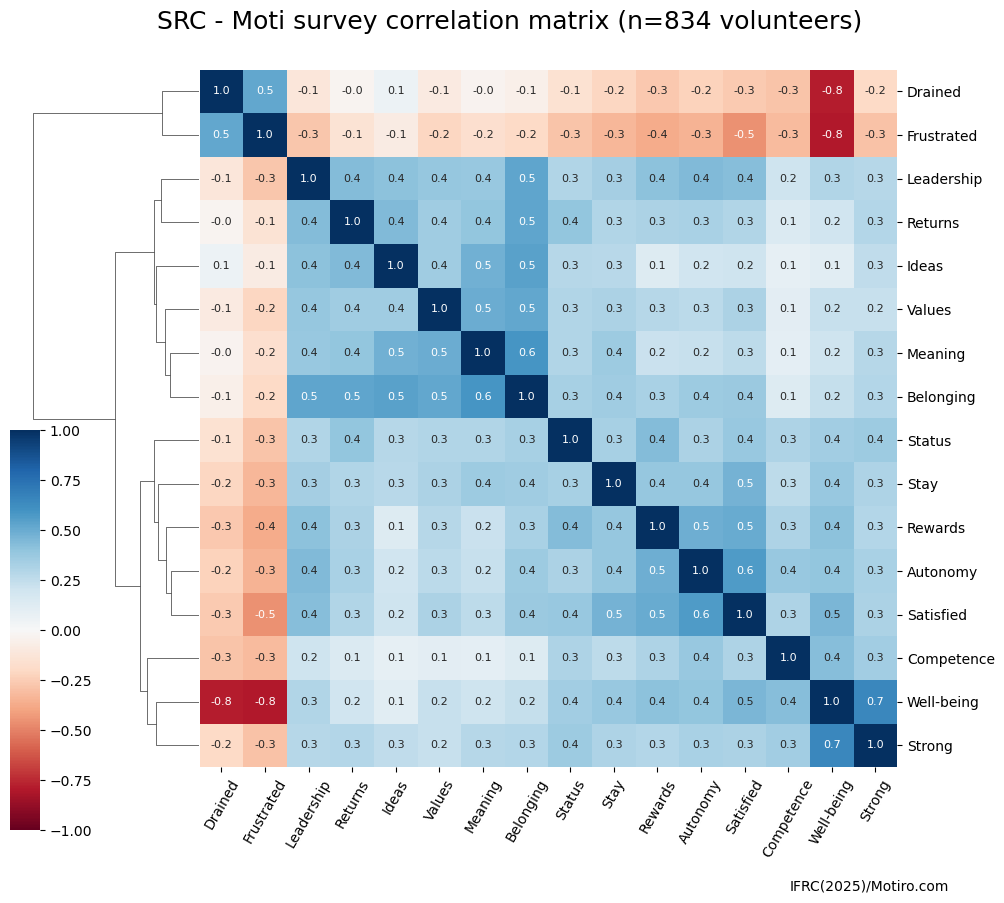

In [47]:
# Summary correlation matrix with grouped scores Ukraine Red Cross
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

columns = ['Well-being',
           'Ideas',
           'Meaning',
           'Values',
           'Autonomy',
           'Belonging',
           'Competence',
           'Leadership',
           'Returns',
           'Rewards',
           'Status',
           'Satisfied',
           'Stay',
           'Strong',
           'Drained',
           'Frustrated']

# Create the table with the desired columns
df = df[columns]

g = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   #row_cluster=False,
                   cmap   = 'RdBu', vmin=-1, vmax=1,
                   cbar_pos=(0, .05, .03, .4),
                   annot  = True , fmt=".1f",
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

g.ax_col_dendrogram.remove()

plt.suptitle(f'{NS} - Moti survey correlation matrix (n={n} volunteers)',
             x=0.5, y=0.87, fontsize=18)
plt.text(26, -1.3, "IFRC(2025)/Motiro.com")

# Show the plot
plt.savefig(f'{NS} Summary Correlation Matrix.png', bbox_inches='tight', pad_inches=0)
plt.show()


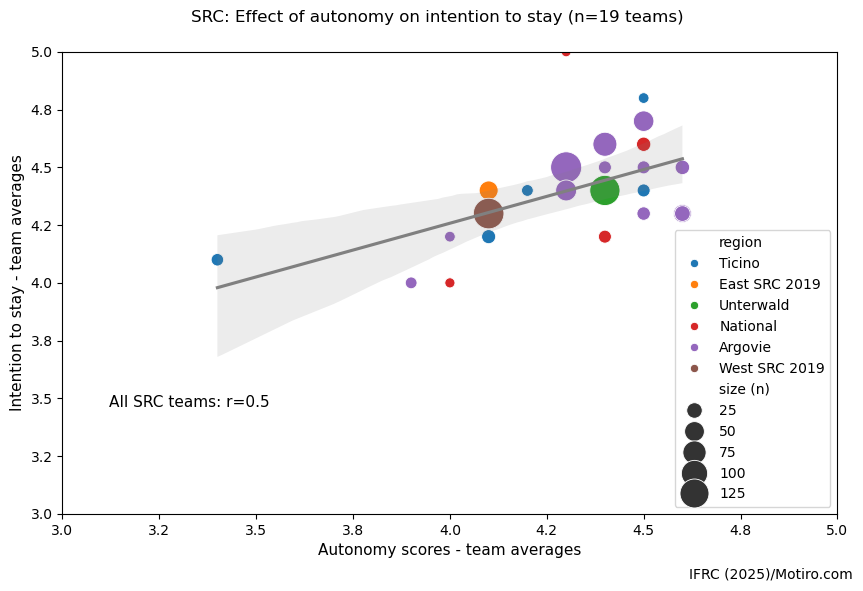

In [51]:
# NS: EFFECTS OF AUTONOMY ON ENGAGEMENT
df = pd.read_csv(f'{NS}_team.csv')
   
# Count the total number of respondents (n)
n = df['Volunteer'].sum()

# Create the bubble graph
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='Autonomy_mean', y='Stay_mean', size='size (n)',
                hue='region', sizes=(50, 500))
plt.xlim((3,5))
plt.ylim((3,5))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))

sns.regplot(data=df, x='Autonomy_mean', y='Stay_mean', color='gray', scatter=False)

# Calculate and display correlation coefficients
volunteer_corr = pearsonr(df['Autonomy_mean'], df['Stay_mean'])[0]

# Add correlation coefficient labels within the plot area
plt.text(0.06, 0.231, f'All {NS} teams: r={volunteer_corr:.1f}', color='black',
         size=11, transform=plt.gca().transAxes)

# Set the labels and title
plt.xlabel('Autonomy scores - team averages', fontsize=11)
plt.ylabel('Intention to stay - team averages', fontsize=11)

plt.suptitle(f'{NS}: Effect of autonomy on intention to stay (n={n:.0f} teams)',
             x=0.5, y=0.95, fontsize=12)
plt.annotate("IFRC (2025)/Motiro.com", xy=(0.8,-0.1), xycoords="axes fraction",
                    xytext=(5,-5), textcoords="offset points",
                    ha="left", va="top")
# Save and show the plot
plt.savefig(f'{NS}-Autonomy_vs_Stay.png', bbox_inches='tight', pad_inches=0)
plt.show()

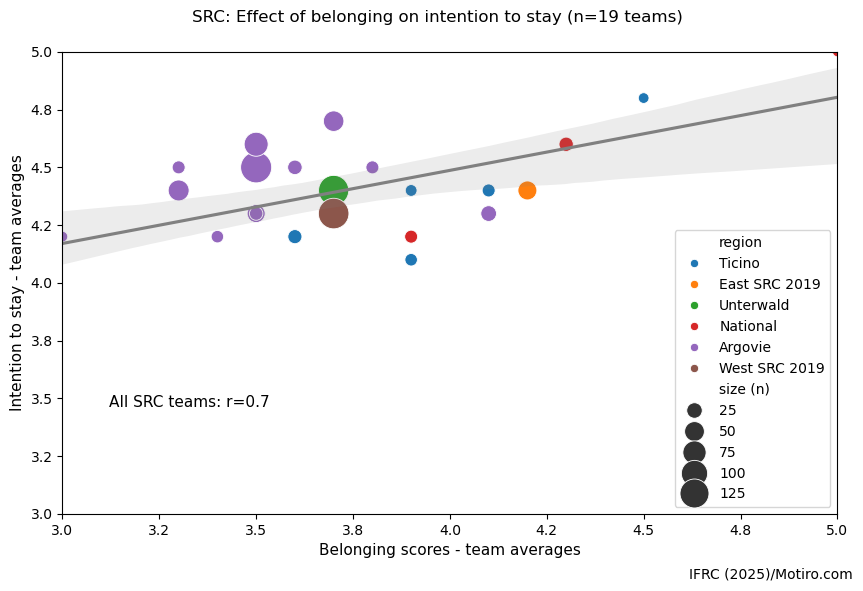

In [52]:
# UKRAINE RED CROSS: EFFECTS OF BELONGING ON INTENTION TO STAY
df = pd.read_csv(f'{NS}_team.csv')
   
# Count the total number of respondents (n)
n = df['Volunteer'].sum()

# Create the bubble graph
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=team_df, x='Belonging_mean', y='Stay_mean', size='size (n)',
                hue='region', sizes=(50, 500))
plt.xlim((3,5))
plt.ylim((3,5))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))

sns.regplot(data=team_df, x='Belonging_mean', y='Stay_mean', color='gray', scatter=False)

# Calculate and display correlation coefficients
volunteer_corr = pearsonr(df['Belonging_mean'], df['Stay_mean'])[0]

# Add correlation coefficient labels within the plot area
plt.text(0.06, 0.231, f'All {NS} teams: r={volunteer_corr:.1f}', color='black',
         size=11, transform=plt.gca().transAxes)

# Set the labels and title
plt.xlabel('Belonging scores - team averages', fontsize=11)
plt.ylabel('Intention to stay - team averages', fontsize=11)

plt.suptitle(f'{NS}: Effect of belonging on intention to stay (n={n:.0f} teams)',
             x=0.5, y=0.95, fontsize=12)
plt.annotate("IFRC (2025)/Motiro.com", xy=(0.8,-0.1), xycoords="axes fraction",
                    xytext=(5,-5), textcoords="offset points",
                    ha="left", va="top")
# Save and show the plot
plt.savefig(f'{NS}-Belonging_vs_Stay.png', bbox_inches='tight', pad_inches=0)
plt.show()

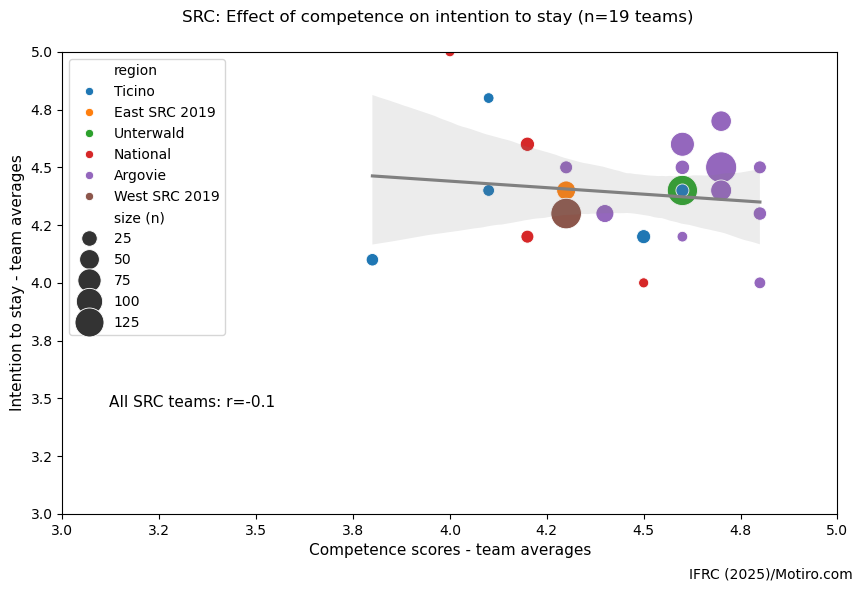

In [54]:
# UKRAINE RED CROSS: EFFECTS OF COMPETENCE ON INTENTION TO STAY
df = pd.read_csv(f'{NS}_team.csv')
   
# Count the total number of respondents (n)
n = df['Volunteer'].sum()

# Create the bubble graph
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=team_df, x='Competence_mean', y='Stay_mean', size='size (n)',
                hue='region', sizes=(50, 500))
plt.xlim((3,5))
plt.ylim((3,5))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))

sns.regplot(data=team_df, x='Competence_mean', y='Stay_mean', color='gray', scatter=False)

# Calculate and display correlation coefficients
volunteer_corr = pearsonr(df['Competence_mean'], df['Stay_mean'])[0]

# Add correlation coefficient labels within the plot area
plt.text(0.06, 0.231, f'All {NS} teams: r={volunteer_corr:.1f}', color='black',
         size=11, transform=plt.gca().transAxes)

# Set the labels and title
plt.xlabel('Competence scores - team averages', fontsize=11)
plt.ylabel('Intention to stay - team averages', fontsize=11)

plt.suptitle(f'{NS}: Effect of competence on intention to stay (n={n:.0f} teams)',
             x=0.5, y=0.95, fontsize=12)
plt.annotate("IFRC (2025)/Motiro.com", xy=(0.8,-0.1), xycoords="axes fraction",
                    xytext=(5,-5), textcoords="offset points",
                    ha="left", va="top")
# Save and show the plot
plt.savefig(f'{NS}-Competence_vs_Stay.png', bbox_inches='tight', pad_inches=0)
plt.show()

Note: you may need to restart the kernel to use updated packages.
Well-being Needs 0.19811017760810778 0.44509569488831024
Well-being Autonomy 0.1586352327237539 0.39829038743579276
Well-being Belonging 0.05590472233867949 0.236441794822065
Well-being Competence 0.17835912601398562 0.4223258528837486
Well-being Leadership 0.08966074235719801 0.2994340367379734
Well-being Understands 0.12812427483027966 0.357944513619471
Well-being Encourages 0.05420062424826422 0.23281027522054137
Well-being Listens 0.0412101045940082 0.20300272065666558
Well-being Management 0.1783310309634505 0.4222925892831302
Well-being Returns 0.04063582281519329 0.2015832900197665
Well-being Rewards 0.16798913244955094 0.4098647733698896
Well-being Status 0.12356402441094694 0.3515167484074506
Satisfied Needs 0.32686423633453987 0.5717204179794
Satisfied Autonomy 0.32495516185507467 0.5700483855385213
Satisfied Belonging 0.13872653021843573 0.3724601055394198
Satisfied Competence 0.09689913322556265 0.31128625608

C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_19912\3463061277.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


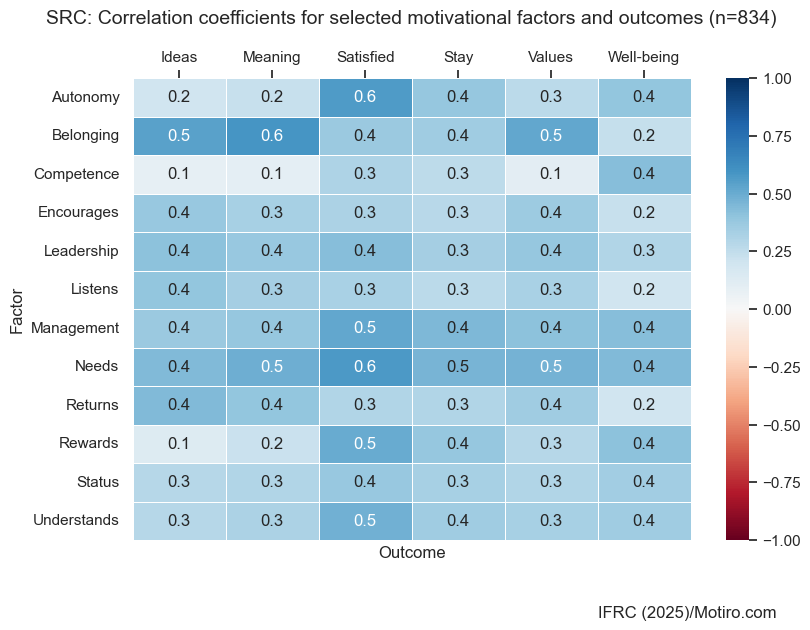

In [56]:
#  COUNTRY PROFILE: NS
#  CORRELATION COEFFICIENTS for staying, being staisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using Linear regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

# %pip install scikit-learn
%pip install openpyxl

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

df = pd.read_csv(f'{NS}_ALL.csv')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

columnY = ['Well-being', 'Satisfied', 'Meaning', 'Values', 'Ideas', 'Stay'] 
columnX = ['Needs', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Understands', 'Encourages', 'Listens',
           'Management', 'Returns', 'Rewards', 'Status']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'CorrCoef'])

for Y in columnY:
    for X in columnX:
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        model = LinearRegression().fit(X_data, Y_data)
        r_sq = model.score(X_data, Y_data)
        r = np.sqrt(r_sq)
        print(Y, X, r_sq, r)
        # Append results to the results_df DataFrame
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'CorrCoef': [r]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)


# Display the results DataFrame
#print(results_df)

# Save the results DataFrame to a CSV file
results_df.to_csv(f'CorrCoef_{NS}.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='CorrCoef')

# Display the pivot_table
print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel(f'CorrCoef_PivotTable_{NS}.xlsx', index=False)      

# heatmap to represent odds ratios for LEBANESE RED CROSS only (all are volunteers)
sns.set_theme()
# Load the results DataFrame from the CSV file
df = pd.read_csv(f'CorrCoef_{NS}.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='CorrCoef')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=-1, vmax=1, linewidths=.5, cmap='RdBu', ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5, 14, "IFRC (2025)/Motiro.com", fontdict={'size': 12})
plt.title(f'{NS}: Correlation coefficients for selected motivational factors and outcomes (n={n})', 
          x=0.5, y=1.1, fontsize=14)

# Save the plot as an image file
plt.savefig(f'{NS}_r_heatmap.png', bbox_inches='tight', pad_inches=0)

Well-being Needs 0.19811017760810778 0.44509569488831024
Well-being Autonomy 0.1586352327237539 0.39829038743579276
Well-being Belonging 0.05590472233867949 0.236441794822065
Well-being Competence 0.17835912601398562 0.4223258528837486
Well-being Leadership 0.08966074235719801 0.2994340367379734
Well-being Understands 0.12812427483027966 0.357944513619471
Well-being Encourages 0.05420062424826422 0.23281027522054137
Well-being Listens 0.0412101045940082 0.20300272065666558
Well-being Management 0.1783310309634505 0.4222925892831302
Well-being Returns 0.04063582281519329 0.2015832900197665
Well-being Rewards 0.16798913244955094 0.4098647733698896
Well-being Status 0.12356402441094694 0.3515167484074506
Satisfied Needs 0.32686423633453987 0.5717204179794
Satisfied Autonomy 0.32495516185507467 0.5700483855385213
Satisfied Belonging 0.13872653021843573 0.3724601055394198
Satisfied Competence 0.09689913322556265 0.31128625608202276
Satisfied Leadership 0.18098920401587237 0.4254282595407507

C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_19912\2614701785.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


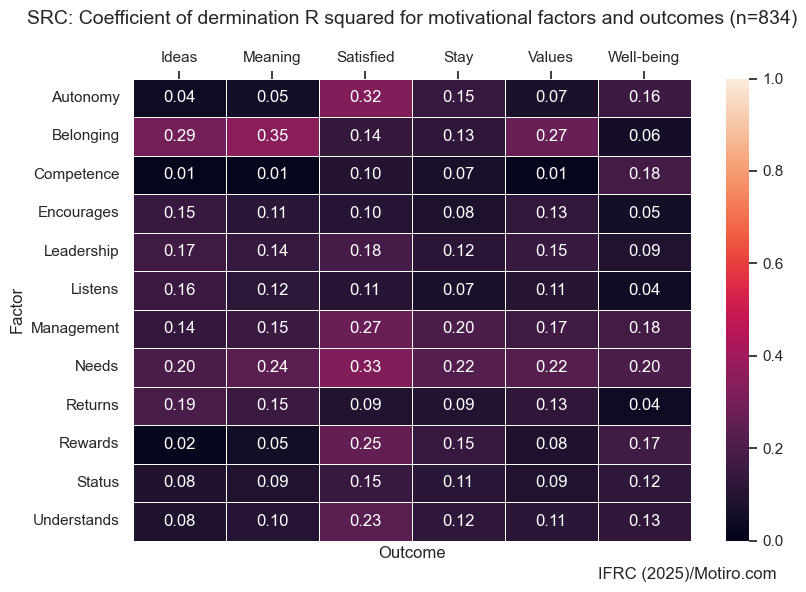

In [57]:
#  COUNTRY PROFILE: NS
#  CORRELATION DETERMINANTS R for staying, being satisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using Linear regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

df = pd.read_csv(f'{NS}_ALL.csv')

columnY = ['Well-being', 'Satisfied', 'Meaning', 'Values', 'Ideas', 'Stay'] 
columnX = ['Needs', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Understands', 'Encourages', 'Listens',
           'Management', 'Returns', 'Rewards', 'Status']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'CorrDet'])

for Y in columnY:
    for X in columnX:
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        model = LinearRegression().fit(X_data, Y_data)
        r_sq = model.score(X_data, Y_data)
        r = np.sqrt(r_sq)
        print(Y, X, r_sq, r)
        
        # Append results to the results_df DataFrame
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'CorrDet': [r_sq]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Save the results DataFrame to a CSV file
results_df.to_csv(f'CorrDet_{NS}.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='CorrDet')

# Display the pivot_table
print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel(f'CorrDet_PivotTable_{NS}.xlsx', index=False)      

# heatmap to represent correlation determinants for UKRAINE RED CROSS only (staff+volunteers)
sns.set_theme()

df = pd.read_csv(f'CorrDet_{NS}.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='CorrDet')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", vmin=0, vmax=1, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5, 13, "IFRC (2025)/Motiro.com", fontdict={'size': 12})
plt.title(f'{NS}: Coefficient of dermination R squared for motivational factors and outcomes (n={n})',
          x=0.5, y=1.1, fontsize=14)

# Save the plot as an image file
plt.savefig(f'{NS}_R-sq_heatmap.png', bbox_inches='tight', pad_inches=0)

In [59]:
# create dummy variables for motivational outcomes (Y) and independent variables (x)
df = pd.read_csv(f"{NS}_ALL.csv", sep=",", encoding='utf-8')

# first we select 2 types of outcome variable - on 1-5 and 1-7 scales
# we create dictionary to recode the values in each category of outcome variables

columns5 = ['Satisfied',
            'Stay',
            'Values',
            'Meaning',
            'Ideas',
            ]

columns7 = ['Strong',
           'Drained',
           'Frustrated']

# we create dictionary to recode the values in each category of outcome variables
# neutral (3) is considered positive, i.e. Y=1 if neutral)
mapping5 = {
    5: 1,
    4: 1,
    3: 1,
    2: 0,
    1: 0
}

# NB: this is the current coding for frequencies:
#    "Every day": 7,
#    "Very often": 6,
#    "Often": 5,
#    "Sometimes": 4,
#    "Rarely": 3,
#    "Almost never": 2,
#    "Never": 1
# We set the cut off point between 4 (sometimes) and 5 (often), i.e. Y=1 if "often"
mapping7 = {
    7: 1,
    6: 1,
    5: 1,
    4: 0,
    3: 0,
    2: 0,
    1: 0
}

df[columns5] = df[columns5].replace(mapping5)
df[columns7] = df[columns7].replace(mapping7)

df.head(20)

#Independent Variables to convert into dummy variables for Odds Ratio computations
# we create dictionary to recode the values in each category of outcome variables
# cutoff point: 3.5 and above considered positive.
# We keep the original continous variables in the data.

df['Well'] = df['Well-being']
df['3Needsmet'] = df['Needs']
df['Autonomous'] = df['Autonomy']
df['Belongs'] = df['Belonging']
df['Competent'] = df['Competence']
df['LeaderOK'] = df['Leadership']
df['Understood'] = df['Understands']
df['Encouraged'] = df['Encourages']
df['Heard'] = df['Listens']
df['ManagementOK'] = df['Management']
df['ReturnsOK'] = df['Returns']
df['RewardsOK'] = df['Rewards']
df['StatusOK'] = df['Status']
   
DummyColumns = [
    'Well',
    '3Needsmet',
    'Autonomous',
    'Belongs',
    'Competent',
    'LeaderOK',
    'Understood',
    'Encouraged',
    'Heard',
    'ManagementOK',
    'ReturnsOK',
    'RewardsOK',
    'StatusOK'
    ] 

# Calculate the rounded value row by row and assign it to a new dummy variable column
# By rounding we can have 3.5 and above as 1  and below 3.5 as 0
df[DummyColumns] = df[DummyColumns].round(0)
df[DummyColumns] = df[DummyColumns].astype(int)
df
mappingX = {
    5: 1,
    4: 1,
    3: 0,
    2: 0,
    1: 0
}

df[DummyColumns] = df[DummyColumns].replace(mappingX)

#for Var_x in df[DummyColumn]:
#    Var_x = float(Var_x)
#    if Var_x < 4 :
#        Var_x = 0
#    else: Var_x = 1
    
#Variables to keep for logistic regressions
columns = ['Strong', 'Drained', 'Frustrated',
           'Satisfied', 'Stay', 'Values', 'Meaning', 'Ideas',
           'region', 'Staff', 'Volunteer',
           'Well-being', 'Needs', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Understands', 'Encourages', 'Listens',
           'Management', 'Returns', 'Rewards', 'Status',
           'Well', '3Needsmet', 'Autonomous', 'Belongs', 'Competent',
           'LeaderOK', 'Understood', 'Encouraged', 'Heard',
           'ManagementOK', 'ReturnsOK', 'RewardsOK', 'StatusOK'
          ]

LogReg_df=df[columns]


LogReg_df.to_csv(f'LogReg_df_{NS}.csv', index=False)
df.head(7)


df.shape

(901, 58)

Stay 3Needsmet [[9.62801623]]
Stay Autonomous [[14.64871615]]
Stay Belongs [[3.89795919]]
Stay Competent [[5.28822053]]
Stay LeaderOK [[3.81440586]]
Stay Understood [[5.37528878]]
Stay Encouraged [[2.72748286]]
Stay Heard [[5.70606049]]
Stay ManagementOK [[6.82581714]]
Stay ReturnsOK [[3.05387883]]
Stay RewardsOK [[8.30766197]]
Stay StatusOK [[7.51335353]]
Satisfied 3Needsmet [[11.40055984]]
Satisfied Autonomous [[23.02808257]]
Satisfied Belongs [[2.42234107]]
Satisfied Competent [[5.89236901]]
Satisfied LeaderOK [[3.73041671]]
Satisfied Understood [[5.07256851]]
Satisfied Encouraged [[2.29920059]]
Satisfied Heard [[3.57723625]]
Satisfied ManagementOK [[15.06263081]]
Satisfied ReturnsOK [[2.64239323]]
Satisfied RewardsOK [[12.23764068]]
Satisfied StatusOK [[6.25403804]]


C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_19912\2322016881.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Meaning 3Needsmet [[10.08689679]]
Meaning Autonomous [[3.66139641]]
Meaning Belongs [[17.72031157]]
Meaning Competent [[2.81930216]]
Meaning LeaderOK [[2.7228553]]
Meaning Understood [[3.77454651]]
Meaning Encouraged [[2.16306269]]
Meaning Heard [[2.10859284]]
Meaning ManagementOK [[2.92440917]]
Meaning ReturnsOK [[3.62864202]]
Meaning RewardsOK [[2.40633354]]
Meaning StatusOK [[3.18027941]]
Values 3Needsmet [[9.3659585]]
Values Autonomous [[6.96402429]]
Values Belongs [[4.08819542]]
Values Competent [[3.40089487]]
Values LeaderOK [[10.16918697]]
Values Understood [[7.36792646]]
Values Encouraged [[4.65637077]]
Values Heard [[6.69067849]]
Values ManagementOK [[6.20737335]]
Values ReturnsOK [[3.33305566]]
Values RewardsOK [[5.33319819]]
Values StatusOK [[6.63083909]]
Ideas 3Needsmet [[5.09982388]]
Ideas Autonomous [[3.03918559]]
Ideas Belongs [[6.8076542]]
Ideas Competent [[2.34440341]]
Ideas LeaderOK [[3.4558272]]
Ideas Understood [[3.65537968]]
Ideas Encouraged [[3.29142169]]
Ideas He

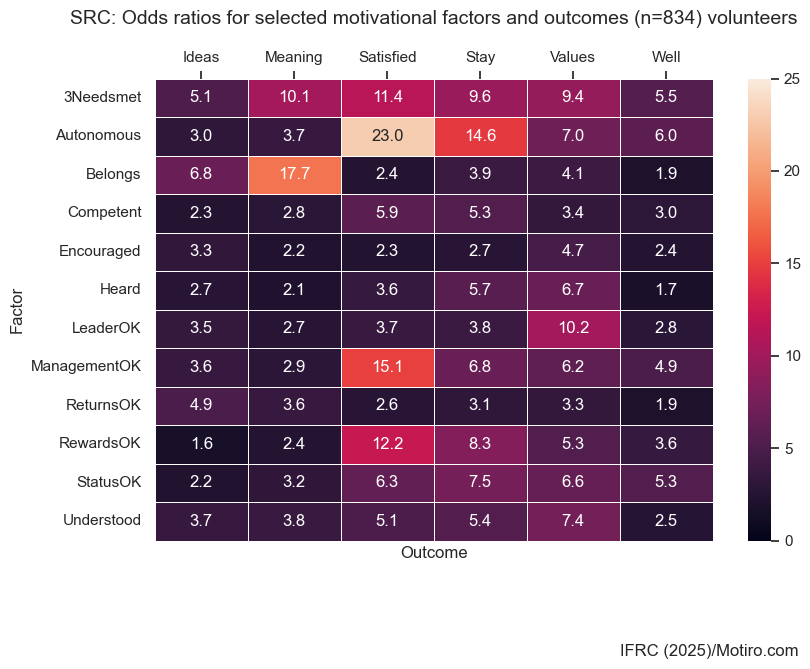

In [63]:
###### COUNTRY PROFILE: NS - VOLUNTEERS ONLY
#  Odds ratios for staying, being satisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using logistic regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression

df = pd.read_csv(f'LogReg_df_{NS}.csv')

# Filter the dataframe for volunteers only
df = df[df['Volunteer'] == 1]
n=df['Volunteer'].sum()

columnY = ['Stay', 'Satisfied', 'Meaning', 'Values', 'Ideas', 'Well'] 
columnX = ['3Needsmet', 'Autonomous', 'Belongs', 'Competent',
           'LeaderOK', 'Understood', 'Encouraged', 'Heard',
           'ManagementOK', 'ReturnsOK', 'RewardsOK', 'StatusOK']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'Odds ratio'])

for Y in columnY:
    for X in columnX:
        clf = LogisticRegression(penalty=None)
        # Reshape the data to be 2D
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        clf.fit(X_data, Y_data)
        odds_ratio = np.exp(clf.coef_)
        print(Y, X, odds_ratio)
        # Append results to the results_df DataFrame using pd.concat
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'Odds ratio': [odds_ratio[0][0]]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the results DataFrame
#print(results_df)

# Save the results DataFrame to a CSV file
results_df.to_csv(f'odds_ratios_{NS}_VOL.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Display the pivot_table
#print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel(f'odds_ratios_PivotTable_{NS}_VOL.xlsx', index=False)      

# heatmap to represent odds ratios for NS only (all are volunteers)
sns.set_theme()

df = pd.read_csv(f'odds_ratios_{NS}_VOL.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=0, vmax=25, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5, 15, "IFRC (2025)/Motiro.com", fontdict={'size': 12})
plt.title(f'{NS}: Odds ratios for selected motivational factors and outcomes (n={n}) volunteers',
          x=0.5, y=1.1, fontsize=14)

# Save the plot as an image file
plt.savefig(f'{NS}_OR_heatmap_VOL.png', bbox_inches='tight', pad_inches=0)

Stay 3Needsmet [[9542.79940222]]
Stay Autonomous [[3797.84181152]]
Stay Belongs [[2757.83133812]]
Stay Competent [[0.01040488]]
Stay LeaderOK [[1.78536376]]
Stay Understood [[1.78536376]]
Stay Encouraged [[5.11533989]]
Stay Heard [[2.40234654]]
Stay ManagementOK [[2343.62229188]]
Stay ReturnsOK [[3040.23981278]]
Stay RewardsOK [[2009.48181148]]
Stay StatusOK [[0.03635227]]
Satisfied 3Needsmet [[45.58770393]]
Satisfied Autonomous [[26.87382888]]
Satisfied Belongs [[4.70838303]]
Satisfied Competent [[4.92053693]]
Satisfied LeaderOK [[6.27863365]]
Satisfied Understood [[6.27863365]]
Satisfied Encouraged [[1.62809827]]
Satisfied Heard [[8.85039191]]
Satisfied ManagementOK [[4878.43956935]]
Satisfied ReturnsOK [[2.28635804]]
Satisfied RewardsOK [[5888.98327636]]
Satisfied StatusOK [[3.6207592]]
Meaning 3Needsmet [[8688.11582962]]
Meaning Autonomous [[4.91153967]]
Meaning Belongs [[1377.86712966]]
Meaning Competent [[0.06491444]]
Meaning LeaderOK [[0.00426893]]
Meaning Understood [[0.0042689

C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_19912\1637323418.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


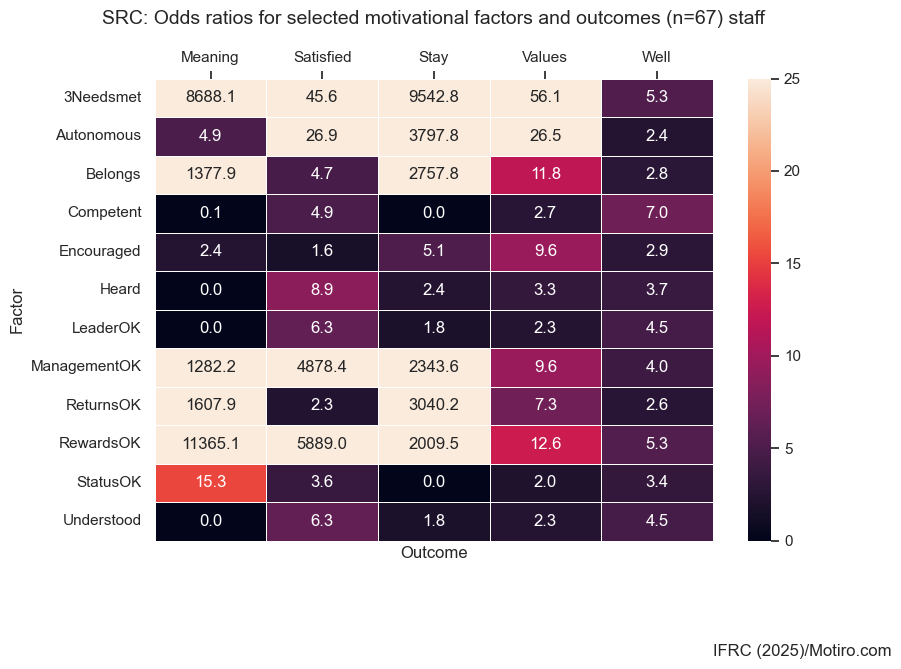

In [64]:
###### COUNTRY PROFILE: NS - STAFF ONLY
#  Odds ratios for staying, being satisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using logistic regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression

df = pd.read_csv(f'LogReg_df_{NS}.csv')

# Filter the dataframe for staff only
df = df[df['Staff'] == 1]
n=df['Staff'].sum()

columnY = ['Stay', 'Satisfied', 'Meaning', 'Values', 'Ideas', 'Well'] 
columnX = ['3Needsmet', 'Autonomous', 'Belongs', 'Competent',
           'LeaderOK', 'Understood', 'Encouraged', 'Heard',
           'ManagementOK', 'ReturnsOK', 'RewardsOK', 'StatusOK']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'Odds ratio'])

for Y in columnY:
    for X in columnX:
        clf = LogisticRegression(penalty=None)
        # Reshape the data to be 2D
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        # Check if Y_data contains at least two classes
        if len(Y_data.unique()) > 1:
            clf.fit(X_data, Y_data)
            odds_ratio = np.exp(clf.coef_)
            print(Y, X, odds_ratio)
            # Append results to the results_df DataFrame using pd.concat
            new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'Odds ratio': [odds_ratio[0][0]]})
            results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the results DataFrame
#print(results_df)

# Save the results DataFrame to a CSV file
results_df.to_csv(f'odds_ratios_{NS}_STAFF.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Display the pivot_table
#print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel(f'odds_ratios_PivotTable_{NS}_STAFF.xlsx', index=False)      

# heatmap to represent odds ratios for UKRAINE RED CROSS only (all are volunteers)
sns.set_theme()

df = pd.read_csv(f'odds_ratios_{NS}_STAFF.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=0, vmax=25, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5, 15, "IFRC (2025)/Motiro.com", fontdict={'size': 12})
plt.title(f'{NS}: Odds ratios for selected motivational factors and outcomes (n={n}) staff',
          x=0.5, y=1.1, fontsize=14)

# Save the plot as an image file
plt.savefig(f'{NS}_OR_heatmap_STAFF.png', bbox_inches='tight', pad_inches=0)

Stay 3Needsmet [[9.62801623]]
Stay Autonomous [[14.64871615]]
Stay Belongs [[3.89795919]]
Stay Competent [[5.28822053]]
Stay LeaderOK [[3.81440586]]
Stay Understood [[5.37528878]]
Stay Encouraged [[2.72748286]]
Stay Heard [[5.70606049]]
Stay ManagementOK [[6.82581714]]
Stay ReturnsOK [[3.05387883]]
Stay RewardsOK [[8.30766197]]
Stay StatusOK [[7.51335353]]
Drained 3Needsmet [[0.34969896]]
Drained Autonomous [[0.48869345]]
Drained Belongs [[0.81929172]]
Drained Competent [[0.41099405]]
Drained LeaderOK [[0.23270158]]
Drained Understood [[0.32292141]]
Drained Encouraged [[0.26681752]]
Drained Heard [[0.24880581]]
Drained ManagementOK [[0.4000149]]
Drained ReturnsOK [[0.74925275]]
Drained RewardsOK [[0.40176909]]
Drained StatusOK [[0.70679748]]
Frustrated 3Needsmet [[0.09761363]]
Frustrated Autonomous [[0.40121019]]
Frustrated Belongs [[0.26496775]]
Frustrated Competent [[0.1609101]]
Frustrated LeaderOK [[0.14269893]]
Frustrated Understood [[0.13678707]]
Frustrated Encouraged [[0.23904239

C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_19912\2475372403.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Ideas ReturnsOK [[4.90430728]]
Ideas RewardsOK [[1.62507898]]
Ideas StatusOK [[2.2107138]]


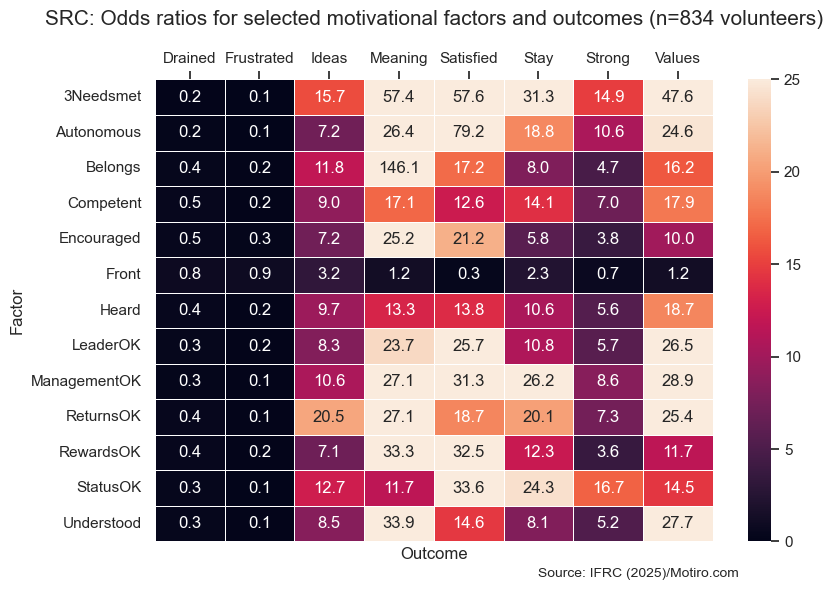

In [66]:
#  COUNTRY PROFILE: NS
#  Odds ratios for staying, being staisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using logistic regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression

df = pd.read_csv(f'LogReg_df_{NS}.csv')

# Filter the dataframe for volunteers only
df = df[df['Volunteer'] == 1]
n=df['Volunteer'].sum()

columnY = ['Stay', 'Drained', 'Frustrated', 'Strong', 'Satisfied', 'Meaning', 'Values', 'Ideas'] 
columnX = ['3Needsmet', 'Autonomous', 'Belongs', 'Competent',
           'LeaderOK', 'Understood', 'Encouraged', 'Heard',
           'ManagementOK', 'ReturnsOK', 'RewardsOK', 'StatusOK']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'Odds ratio'])

for Y in columnY:
    for X in columnX:
        clf = LogisticRegression(penalty=None)
        # Reshape the data to be 2D
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        clf.fit(X_data, Y_data)
        odds_ratio = np.exp(clf.coef_)
        print(Y, X, odds_ratio)
        # Append results to the results_df DataFrame using pd.concat
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'Odds ratio': [odds_ratio[0][0]]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the results DataFrame
#print(results_df)

# Save the results DataFrame to a CSV file
results_df.to_csv(f'odds_ratios_{NS}_VOL.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Display the pivot_table
#print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel('odds_ratios_PivotTable_Ukraine_VOL.xlsx', index=False)      

# heatmap to represent odds ratios for UKRAINE RED CROSS only (volunteers only)
sns.set_theme()

df = pd.read_csv('odds_ratios_Ukraine_VOL.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=0, vmax=25, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5.5, 14, "Source: IFRC (2025)/Motiro.com", fontdict={'size': 10})
plt.title(f'{NS}: Odds ratios for selected motivational factors and outcomes (n={n} volunteers)', x=0.5, y=1.1, fontsize=15)

# Save the plot as an image file
plt.savefig(f'{NS}_OR_heatmap2_VOL.png')

Status {'size': 75, 'color': 'bisque'}
Rewards {'size': 75, 'color': 'bisque'}
Returns {'size': 75, 'color': 'bisque'}
Listens {'size': 75, 'color': 'lightblue'}
Understands {'size': 75, 'color': 'lightblue'}
Encourages {'size': 75, 'color': 'lightblue'}
Autonomy {'size': 75, 'color': 'thistle'}
Belonging {'size': 75, 'color': 'thistle'}
Competence {'size': 75, 'color': 'thistle'}
Frustrated {'size': 75, 'color': 'pink'}
Drained {'size': 75, 'color': 'pink'}
Strong {'size': 75, 'color': 'pink'}
Meaning {'size': 75, 'color': 'palegreen'}
Ideas {'size': 75, 'color': 'palegreen'}
Values {'size': 75, 'color': 'palegreen'}
Stay {'size': 75, 'color': 'palegreen'}
Satisfied {'size': 75, 'color': 'palegreen'}


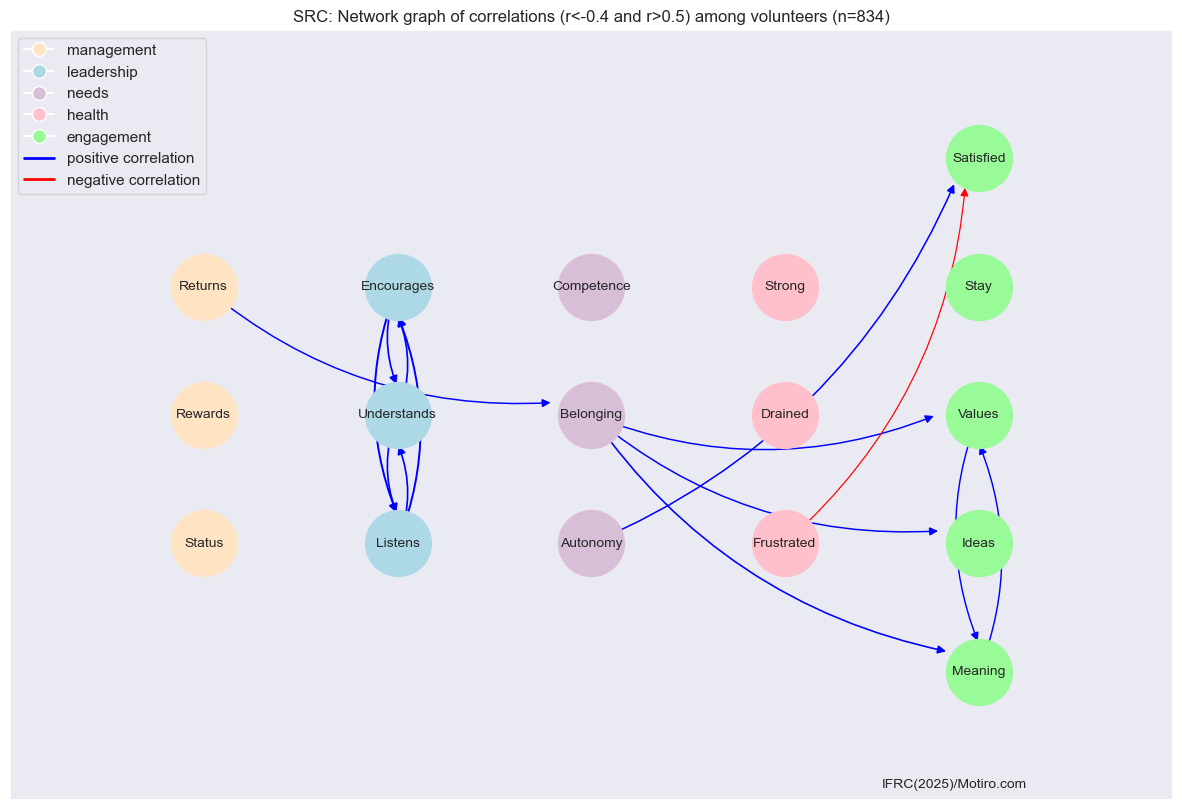

In [68]:
## VOLUNTEERS Ukraine Red Cross Correlations network graph key variables on horizontal axis
import networkx as nx
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import math

#set correlation coefficient thresholds for graph
negcorr = -0.4
poscorr = 0.5

df = pd.read_csv(f"{NS}_ALL.csv", sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Volunteer']
#df = df[df['frontline'] == 'Frontline']
#df = df[df['region'] == 'Donetsk Region']

# Count the total number of volunteers in filtered dataframe (n)
n = df['Volunteer'].sum()

# Compute correlation matrix with numeric_only set to True to avoid warning
corr_matrix = df.corr(numeric_only=True)


# Define variable sets
management_vars = ['Status', 'Rewards', 'Returns']
leadership_vars = ['Listens', 'Understands', 'Encourages']
needs_vars = ['Autonomy', 'Belonging', 'Competence']
health_vars = ['Frustrated', 'Drained', 'Strong']
engagement_vars = ['Meaning', 'Ideas', 'Values', 'Stay', 'Satisfied']

all_vars = management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

# Create the graph
G = nx.DiGraph()

# Define variable colors
colors = {
    'management_vars': 'bisque',
    'leadership_vars': 'lightblue',
    'needs_vars': 'thistle',
    'health_vars': 'pink',
    'engagement_vars': 'palegreen'
}

# Modify the node addition part to include the color attribute
for var in all_vars:
    node_size = sum(corr_matrix[var])  # Sum of correlation coefficients
    if var in management_vars:
        node_color = colors['management_vars']
    elif var in leadership_vars:
        node_color = colors['leadership_vars']
    elif var in needs_vars:
        node_color = colors['needs_vars']
    elif var in health_vars:
        node_color = colors['health_vars']
    else:
        node_color = colors['engagement_vars']
    G.add_node(var, size=node_size, color=node_color)
    

# adjust arrows so that they touch circle periphery and are not hidden by the nodes' colored circle

def adjust_line_to_circle(x1, y1, x2, y2, r):
    """
    Adjusts the line segment (x1, y1) to (x2, y2) to stop at the circumference of a circle of radius r centered at (x2, y2).
    """
    angle = math.atan2(y2 - y1, x2 - x1)
    x2_new = x2 - r * math.cos(angle)
    y2_new = y2 - r * math.sin(angle)
    return x1, y1, x2_new, y2_new

# Add edges with color and weight attributes
for var1 in all_vars:
    for var2 in all_vars:
        correlation = corr_matrix[var1][var2]
        if var1 != var2 and not np.isnan(correlation) and (correlation > poscorr or correlation < negcorr):
            weight = abs(correlation)
            color = 'blue' if correlation > 0 else 'red'
            
            # Define the direction based on variable sets
            if var1 in management_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in needs_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in management_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in health_vars and var2 in engagement_vars:
                G.add_edge(var1, var2, weight=weight, color=color)
            elif set([var1, var2]).issubset(set(management_vars)) or \
                 set([var1, var2]).issubset(set(leadership_vars)) or \
                 set([var1, var2]).issubset(set(needs_vars)) or \
                 set([var1, var2]).issubset(set(health_vars)) or \
                 set([var1, var2]).issubset(set(engagement_vars)):
                # Only add bidirectional arrows if they're in the same set
                G.add_edge(var1, var2, weight=weight, color=color)
                G.add_edge(var2, var1, weight=weight, color=color)

# Create positions for nodes
positions = {}
spacing_h = 1
spacing_v = 1

# Compute maximum group length for vertical centering
max_len = max(map(len, [management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))

for i, group in enumerate([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]):
    # Compute the starting y-coordinate for this group
    start_y = (max_len - len(group)) * spacing_v / 2
    
    for j, var in enumerate(group):
        positions[var] = (i * spacing_h, start_y + j * spacing_v)

for node, attributes in G.nodes(data=True):
    if np.isnan(attributes['size']):
        G.nodes[node]['size'] = 75  # Set default size

for node, data in G.nodes(data=True):
    print(node, data)

# Dummy lines for the legend
from matplotlib.lines import Line2D
legend_elements = []

# Adding legend for nodes
for label, color in colors.items():
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=label.replace('_vars', ''), markersize=10, markerfacecolor=color))

# Adding legend for edges
legend_elements.append(Line2D([0], [0], color='blue', lw=2, label='positive correlation'))
legend_elements.append(Line2D([0], [0], color='red', lw=2, label='negative correlation'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Modify the Draw nodes part to use the color from the node attributes
for node, (x, y) in positions.items():
    node_color = G.nodes[node]['color']
    ax.scatter(x, y, s=G.nodes[node]['size'] * 30, c=node_color, zorder=2)
    ax.text(x, y, node, ha='center', va='center', fontsize=10, zorder=3)

# Draw edges with a slight curve using connectionstyle
for u, v, data in G.edges(data=True):
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    
    # Adjust end of arrow to connect to the node circle's periphery
    node_radius = math.sqrt(G.nodes[v]['size'] * 0.002 / math.pi)
    x1, y1, x2, y2 = adjust_line_to_circle(x1, y1, x2, y2, node_radius)

    arrowprops = dict(arrowstyle='-|>', linewidth=data['weight'] * 2, color=data['color'], 
                      connectionstyle="arc3,rad=0.2")  # Adding a curve
    plt.annotate("", xy=(x2, y2), xytext=(x1, y1), arrowprops=arrowprops, zorder=1)

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper left')

plt.title(f'{NS}: Network graph of correlations (r<{negcorr} and r>{poscorr}) among volunteers (n={n})')
plt.text(3.5, -0.9, "IFRC(2025)/Motiro.com", size=10)
plt.xlim(-1, len([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))
plt.ylim(-1, max_len)  # Using max_len for the ylim

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig(f'{NS} VOL SDTCorrNetworkGraph.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


Status {'size': 75, 'color': 'bisque'}
Rewards {'size': 75, 'color': 'bisque'}
Returns {'size': 75, 'color': 'bisque'}
Listens {'size': 75, 'color': 'lightblue'}
Understands {'size': 75, 'color': 'lightblue'}
Encourages {'size': 75, 'color': 'lightblue'}
Autonomy {'size': 75, 'color': 'thistle'}
Belonging {'size': 75, 'color': 'thistle'}
Competence {'size': 75, 'color': 'thistle'}
Frustrated {'size': 75, 'color': 'pink'}
Drained {'size': 75, 'color': 'pink'}
Strong {'size': 75, 'color': 'pink'}
Meaning {'size': 75, 'color': 'palegreen'}
Ideas {'size': 75, 'color': 'palegreen'}
Values {'size': 75, 'color': 'palegreen'}
Stay {'size': 75, 'color': 'palegreen'}
Satisfied {'size': 75, 'color': 'palegreen'}


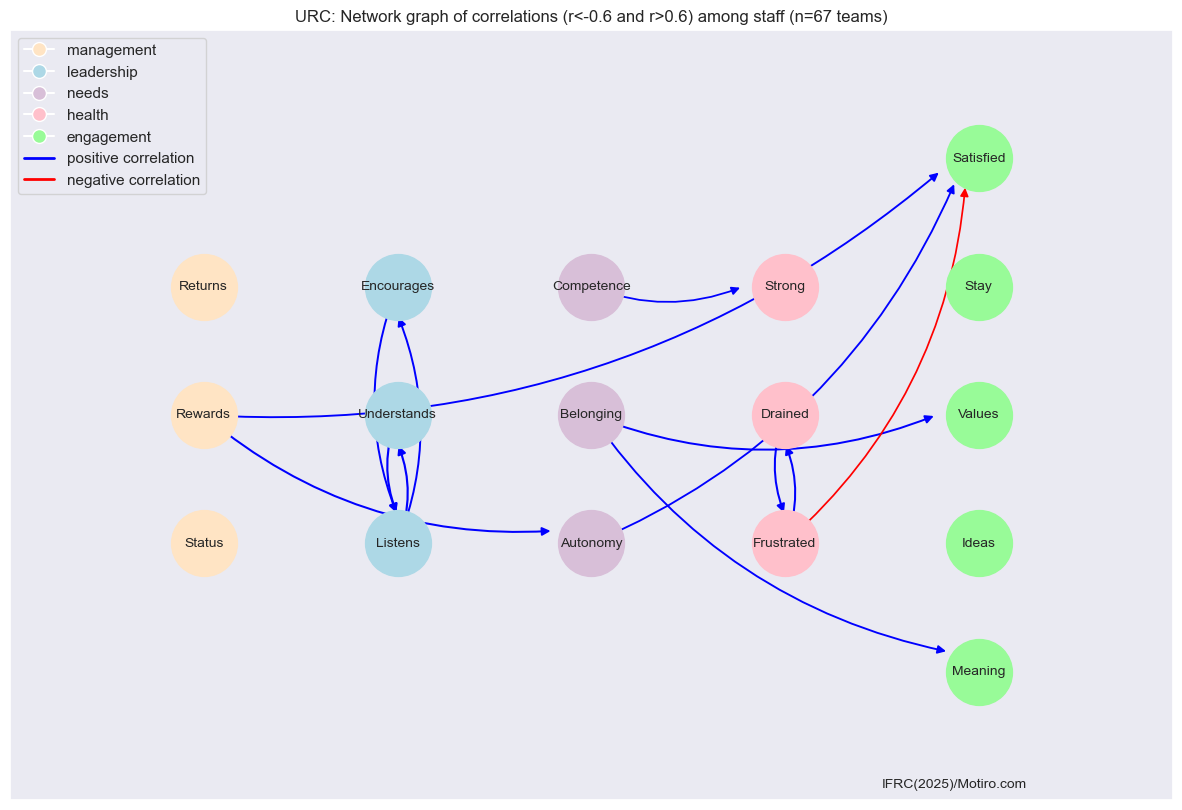

In [71]:
## STAFF NS Correlations network graph key variables on horizontal axis
import networkx as nx
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import math

#set correlation coefficient thresholds for graph
negcorr = -0.6
poscorr = 0.6

df = pd.read_csv(f"{NS}_ALL.csv")

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Staff']
#df = df[df['frontline'] == 'Frontline']
#df = df[df['region'] == 'Donetsk Region']

# Count the total number of teams in filtered dataframe (n)
n = df['Staff'].sum()

# Compute correlation matrix with numeric_only set to True to avoid warning
corr_matrix = df.corr(numeric_only=True)


# Define variable sets
management_vars = ['Status', 'Rewards', 'Returns']
leadership_vars = ['Listens', 'Understands', 'Encourages']
needs_vars = ['Autonomy', 'Belonging', 'Competence']
health_vars = ['Frustrated', 'Drained', 'Strong']
engagement_vars = ['Meaning', 'Ideas', 'Values', 'Stay', 'Satisfied']

all_vars = management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

# Create the graph
G = nx.DiGraph()

# Define variable colors
colors = {
    'management_vars': 'bisque',
    'leadership_vars': 'lightblue',
    'needs_vars': 'thistle',
    'health_vars': 'pink',
    'engagement_vars': 'palegreen'
}

# Modify the node addition part to include the color attribute
for var in all_vars:
    node_size = sum(corr_matrix[var])  # Sum of correlation coefficients
    if var in management_vars:
        node_color = colors['management_vars']
    elif var in leadership_vars:
        node_color = colors['leadership_vars']
    elif var in needs_vars:
        node_color = colors['needs_vars']
    elif var in health_vars:
        node_color = colors['health_vars']
    else:
        node_color = colors['engagement_vars']
    G.add_node(var, size=node_size, color=node_color)
    

# adjust arrows so that they touch circle periphery and are not hidden by the nodes' colored circle

def adjust_line_to_circle(x1, y1, x2, y2, r):
    """
    Adjusts the line segment (x1, y1) to (x2, y2) to stop at the circumference of a circle of radius r centered at (x2, y2).
    """
    angle = math.atan2(y2 - y1, x2 - x1)
    x2_new = x2 - r * math.cos(angle)
    y2_new = y2 - r * math.sin(angle)
    return x1, y1, x2_new, y2_new

# Add edges with color and weight attributes
for var1 in all_vars:
    for var2 in all_vars:
        correlation = corr_matrix[var1][var2]
        if var1 != var2 and not np.isnan(correlation) and (correlation > poscorr or correlation < negcorr):
            weight = abs(correlation)
            color = 'blue' if correlation > 0 else 'red'
            
            # Define the direction based on variable sets
            if var1 in management_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in needs_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in management_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in health_vars and var2 in engagement_vars:
                G.add_edge(var1, var2, weight=weight, color=color)
            elif set([var1, var2]).issubset(set(management_vars)) or \
                 set([var1, var2]).issubset(set(leadership_vars)) or \
                 set([var1, var2]).issubset(set(needs_vars)) or \
                 set([var1, var2]).issubset(set(health_vars)) or \
                 set([var1, var2]).issubset(set(engagement_vars)):
                # Only add bidirectional arrows if they're in the same set
                G.add_edge(var1, var2, weight=weight, color=color)
                G.add_edge(var2, var1, weight=weight, color=color)

# Create positions for nodes
positions = {}
spacing_h = 1
spacing_v = 1

# Compute maximum group length for vertical centering
max_len = max(map(len, [management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))

for i, group in enumerate([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]):
    # Compute the starting y-coordinate for this group
    start_y = (max_len - len(group)) * spacing_v / 2
    
    for j, var in enumerate(group):
        positions[var] = (i * spacing_h, start_y + j * spacing_v)

for node, attributes in G.nodes(data=True):
    if np.isnan(attributes['size']):
        G.nodes[node]['size'] = 75  # Set default size

for node, data in G.nodes(data=True):
    print(node, data)

# Dummy lines for the legend
from matplotlib.lines import Line2D
legend_elements = []

# Adding legend for nodes
for label, color in colors.items():
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=label.replace('_vars', ''), markersize=10, markerfacecolor=color))

# Adding legend for edges
legend_elements.append(Line2D([0], [0], color='blue', lw=2, label='positive correlation'))
legend_elements.append(Line2D([0], [0], color='red', lw=2, label='negative correlation'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Modify the Draw nodes part to use the color from the node attributes
for node, (x, y) in positions.items():
    node_color = G.nodes[node]['color']
    ax.scatter(x, y, s=G.nodes[node]['size'] * 30, c=node_color, zorder=2)
    ax.text(x, y, node, ha='center', va='center', fontsize=10, zorder=3)

# Draw edges with a slight curve using connectionstyle
for u, v, data in G.edges(data=True):
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    
    # Adjust end of arrow to connect to the node circle's periphery
    node_radius = math.sqrt(G.nodes[v]['size'] * 0.002 / math.pi)
    x1, y1, x2, y2 = adjust_line_to_circle(x1, y1, x2, y2, node_radius)

    arrowprops = dict(arrowstyle='-|>', linewidth=data['weight'] * 2, color=data['color'], 
                      connectionstyle="arc3,rad=0.2")  # Adding a curve
    plt.annotate("", xy=(x2, y2), xytext=(x1, y1), arrowprops=arrowprops, zorder=1)

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper left')

plt.title(f'URC: Network graph of correlations (r<{negcorr} and r>{poscorr}) among staff (n={n} teams)')
plt.text(3.5, -0.9, "IFRC(2025)/Motiro.com", size=10)
plt.xlim(-1, len([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))
plt.ylim(-1, max_len)  # Using max_len for the ylim

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig(f'{NS} STAFF SDTCorrNetworkGraph.png', bbox_inches='tight', pad_inches=0.1)
plt.show()
